# 이 파일은 수련자2 계정에서 돌림

#=1.Topic Modeling / Aspect Extraction =

In [ ]:
#importing libraies
!pip install top2vec
# !pip install top2vec[sentence_transformers]
from top2vec import Top2Vec

In [ ]:
# from top2vec import Top2Vec
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


# 외부에서 전처리 완료 후 가져온 파일

In [ ]:
ver = "_3"
file_name = "Sentence_pos" + ver + ".pkl" 
file_name

'Sentence_pos_3.pkl'

In [ ]:
import pickle
import os
os.chdir("/gdrive/MyDrive/LG 플젝-민/Sentence POS")

In [ ]:
# 피클 안됨 ver2는 됨
with open(file_name,'rb') as fr:
    df = pickle.load(fr) # ver2 3
len(df)
# # csv
# import pandas as pd
# df = pd.read_csv("Sentence_pos_1.csv") # ver1
# len(df)

1055774

In [ ]:
df

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,pre_sent,doc_id,token_a
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,model number lmxs image dispenser water keeps ...,0,"[model, number, lmxs, image, dispenser, water,..."
1,REDDIT_273_hqopz6d,NaN,Reddit,Dec 31 14:50:24 2021,reddit.com,lg_ref,"['Nope, also stay away from LG and Samsung.']","['nope, also stay away from lg and samsung.', ...",nope also stay away from lg and samsung,nope also stay away from lg and samsung,nope also stay away,1,"[nope, also, stay, away]"
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,water filters present high quality drinking wa...,2,"[water, filters, present, high, quality, drink..."
3,WEB_100_sg_C3F0D712F78A633B49DD608D95337DCF,NaN,Forums,Dec 31 14:27:00 2021,forums.redflagdeals.com,lg_ref,"['Dammit.', 'What should I do?', 'I already ha...",['i already have a dishwasher but i am in the ...,i already have a dishwasher but i am in the ma...,i already have a dishwasher but i am in the ma...,already dishwasher market get electric stove,3,"[already, dishwasher, market, get, electric, s..."
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,previously lasted years spent repairs years ex...,4,"[previously, lasted, years, spent, repairs, ye..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,bobby mitsubishi considered premium brands loo...,1111170,"[bobby, mitsubishi, considered, premium, brand..."
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,vietnam cleanest street make sure buy make sur...,1111171,"[vietnam, cleanest, street, make, sure, buy, m..."
1055771,YOUTUBE_44_z22euh5jsqrojnjtoacdp432h4ptbim44dt...,YOUTUBE,Youtube,2017-10-06 23:16:38,NaN,ss_ac,NaN,NaN,NaN,13:41 Ok does anyone see the SAMSUNG air cond...,anyone see unit south korean company hmmmmm ma...,1111172,"[anyone, see, unit, south, korean, company, hm..."
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,asher perlmuter ikr amazed thought love using ...,1111173,"[asher, perlmuter, ikr, amazed, thought, using..."


In [ ]:
# 리스트로 인식

from tqdm import tqdm
tqdm.pandas()
import ast

# df['token_a'] = df['token_a'].progress_apply(lambda word_list: ast.literal_eval(word_list))
df['joint_words'] = df['token_a'].progress_apply(lambda word_list: " ".join(word_list))
df['joint_words'].loc[0]

100%|██████████| 1055774/1055774 [00:01<00:00, 686094.72it/s]


'model number lmxs image dispenser water keeps running want check dispenser switch got damaged'

### Model Training - Doc2Vec 활용

In [ ]:
input_ = list(df['joint_words'])

In [ ]:

embedding_model= "doc2vec"
min_count = 50
pos = " pos"
unit = "sentence" # **


model_name = "[top2vec_"+ embedding_model+"]"+unit+ pos +"_min"+ str(min_count) + ver

In [ ]:

print(model_name)

model = Top2Vec(documents=input_, speed="learn", workers=8, min_count = min_count,embedding_model= embedding_model) #min_counts = 바꿔볼 수도.
model.save(model_name)

[top2vec_doc2vec]sentence pos_min50_3


2022-03-22 03:51:01,726 - top2vec - INFO - Pre-processing documents for training


KeyboardInterrupt: ignored

In [ ]:
model = Top2Vec.load(model_name)

In [ ]:
model.get_num_topics() 

9836

In [ ]:
model.get_topic_sizes()


(array([2680, 1604, 1202, ...,   16,   11,    9]),
 array([   0,    1,    2, ..., 9833, 9834, 9835]))

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(50)


In [ ]:
topic_words

array([['abp', 'noisiest', 'excerpt', ..., 'renewed', 'samsun', 'lnh'],
       ['kumar', 'brahmkshatriya', 'gupta', ..., 'mishra', 'padmini',
        'subrata'],
       ['pleased', 'overall', 'satisfied', ..., 'stars', 'specious',
        'ultimatum'],
       ...,
       ['quirks', 'usernickname', 'notifying', ..., 'expectations',
        'flawlessly', 'messy'],
       ['loved', 'loop', 'cuft', ..., 'lasts', 'bedspreads', 'chose'],
       ['lasted', 'years', 'yrs', ..., 'crapped', 'purchased',
        'repaired']], dtype='<U15')

## Model - 제품 별 Topic Modeling 진행

### ac, rac 통일

In [ ]:
df['label'].unique()

array(['lg_ref', 'ss_ref', 'ss_wm', 'lg_wm', 'ss_ac', 'lg_ac', 'ss_rac',
       'lg_rac'], dtype=object)

In [ ]:
def rac2ac(label):
  if label == 'lg_rac':
    return "lg_ac"
  elif label == 'ss_rac':
    return "ss_ac"
  else:
    return label
df['label'] = df['label'].progress_apply(lambda label: rac2ac(label))

100%|██████████| 1055774/1055774 [00:01<00:00, 822511.29it/s]


In [ ]:
df['label'].unique()

array(['lg_ref', 'ss_ref', 'ss_wm', 'lg_wm', 'ss_ac', 'lg_ac'],
      dtype=object)

In [ ]:
refdf =df[(df['label'] == 'lg_ref')|(df['label'] == 'ss_ref')] # ref 63만
wmdf =df[(df['label'] == 'lg_wm')|(df['label'] == 'ss_wm')]  # wm 35만
acdf = df[(df['label'] == 'lg_ac')|(df['label'] == 'ss_ac')] #6만4천

In [ ]:
prod_dfs = [refdf,wmdf,acdf]
for i,product_df in tqdm(enumerate(prod_dfs)):
  len(product_df)
  print(i)


  input_ = list(product_df['joint_words'])


  embedding_model= "doc2vec"
  min_count = 25
  pos = " pos"
  unit = "sentence" # **


  model_name = "[top2vec_"+ embedding_model+"]"+unit+ pos +"_min"+ str(min_count) + ver + str(i)


  print(model_name)

  model = Top2Vec(documents=input_, speed="learn", workers=8, min_count = min_count,embedding_model= embedding_model) #min_counts = 바꿔볼 수도.
  model.save(model_name)

0it [00:00, ?it/s]

0
[top2vec_doc2vec]sentence pos_min25_30


2022-03-22 03:51:50,087 - top2vec - INFO - Pre-processing documents for training
2022-03-22 03:52:13,784 - top2vec - INFO - Creating joint document/word embedding
2022-03-22 04:41:57,869 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-03-22 04:52:20,699 - top2vec - INFO - Finding dense areas of documents
2022-03-22 04:53:07,704 - top2vec - INFO - Finding topics
1it [1:02:42, 3762.83s/it]

1
[top2vec_doc2vec]sentence pos_min25_31


2022-03-22 04:54:33,110 - top2vec - INFO - Pre-processing documents for training
2022-03-22 04:54:54,103 - top2vec - INFO - Creating joint document/word embedding
2022-03-22 05:21:24,901 - top2vec - INFO - Creating lower dimension embedding of documents
2022-03-22 05:26:15,433 - top2vec - INFO - Finding dense areas of documents
2022-03-22 05:26:39,664 - top2vec - INFO - Finding topics
2it [1:35:26, 2704.55s/it]2022-03-22 05:27:16,387 - top2vec - INFO - Pre-processing documents for training


2
[top2vec_doc2vec]sentence pos_min25_32


2022-03-22 05:27:20,546 - top2vec - INFO - Creating joint document/word embedding
2022-03-22 05:32:25,604 - top2vec - INFO - Creating lower dimension embedding of documents
2022-03-22 05:33:04,205 - top2vec - INFO - Finding dense areas of documents
2022-03-22 05:33:08,105 - top2vec - INFO - Finding topics
3it [1:41:23, 2027.81s/it]


In [ ]:




input_ = list(acdf['joint_words'])


embedding_model= "doc2vec"
min_count = 25
pos = " pos"
unit = "sentence" # **


model_name = "[top2vec_"+ embedding_model+"]"+unit+ pos +"_min"+ str(min_count) + ver + "ac"

print(model_name)
model = Top2Vec(documents=input_, speed="learn", workers=8, min_count = min_count,embedding_model= embedding_model) #min_counts = 바꿔볼 수도.
model.save(model_name)


2022-03-21 14:15:47,637 - top2vec - INFO - Pre-processing documents for training


[top2vec_doc2vec]sentence pos_min25_3ac


2022-03-21 14:15:49,911 - top2vec - INFO - Creating joint document/word embedding
2022-03-21 14:19:22,374 - top2vec - INFO - Creating lower dimension embedding of documents
2022-03-21 14:19:57,589 - top2vec - INFO - Finding dense areas of documents
2022-03-21 14:19:59,464 - top2vec - INFO - Finding topics


In [ ]:
model = Top2Vec.load(model_name)

In [ ]:
model.get_num_topics() 

9836

In [ ]:
model.get_topic_sizes()


(array([2680, 1604, 1202, ...,   16,   11,    9]),
 array([   0,    1,    2, ..., 9833, 9834, 9835]))

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(50)


In [ ]:
topic_words

array([['abp', 'noisiest', 'excerpt', ..., 'renewed', 'samsun', 'lnh'],
       ['kumar', 'brahmkshatriya', 'gupta', ..., 'mishra', 'padmini',
        'subrata'],
       ['pleased', 'overall', 'satisfied', ..., 'stars', 'specious',
        'ultimatum'],
       ...,
       ['quirks', 'usernickname', 'notifying', ..., 'expectations',
        'flawlessly', 'messy'],
       ['loved', 'loop', 'cuft', ..., 'lasts', 'bedspreads', 'chose'],
       ['lasted', 'years', 'yrs', ..., 'crapped', 'purchased',
        'repaired']], dtype='<U15')

### Docu 뽑기

In [ ]:
embedding_model= "doc2vec"
min_count = 25
pos = " pos"
unit = "sentence"

# embedding_model= "doc2vec"
# min_count = 50
# pos = " pos"
# unit = "sentence" # **

for i in range(3):
  model_name = "[top2vec_"+ embedding_model+"]"+unit+ pos +"_min"+ str(min_count) + ver + str(i)
  model = Top2Vec.load(model_name)  
  # 토픽 docu 갯수, id, 단어들 뽑는 코드
  import pandas as pd

  file_name = model_name+ "TOPICS" +".xlsx" 

  top_size_arr = model.get_topic_sizes()
  top_size_arr

  top_size = pd.DataFrame(top_size_arr).T
  top_size.columns = ['number','topic_id']
  top_size

  top_words = []
  topic_words, word_scores, topic_nums = model.get_topics(50)
  for i in range(topic_words.shape[0]):
    top_words.append(str(topic_words[i]))
  top_words = pd.DataFrame(top_words)

  top_words.reset_index(inplace = True)
  top_words.columns = ["topic_id","top50words"]
  top_words

  topic_words = pd.merge(top_size,top_words,on = "topic_id") #pd.merge(df_left,df_right,on = 'col name',how = 'inner'/'outer/left/right')
  topic_words.to_excel(file_name)
  topic_words

In [ ]:
embedding_model= "doc2vec"
min_count = 25
pos = " pos"
unit = "sentence" # **

model_name = "[top2vec_"+ embedding_model+"]"+unit+ pos +"_min"+ str(min_count) + ver + "ac"
model = Top2Vec.load(model_name)  
# 토픽 docu 갯수, id, 단어들 뽑는 코드
import pandas as pd

file_name = model_name+ "TOPICS" +".xlsx" 

top_size_arr = model.get_topic_sizes()
top_size_arr

top_size = pd.DataFrame(top_size_arr).T
top_size.columns = ['number','topic_id']
top_size

top_words = []
topic_words, word_scores, topic_nums = model.get_topics(50)
for i in range(topic_words.shape[0]):
  top_words.append(str(topic_words[i]))
top_words = pd.DataFrame(top_words)

top_words.reset_index(inplace = True)
top_words.columns = ["topic_id","top50words"]
top_words

topic_words = pd.merge(top_size,top_words,on = "topic_id") #pd.merge(df_left,df_right,on = 'col name',how = 'inner'/'outer/left/right')
topic_words.to_excel(file_name)
topic_words



,number,topic_id,top50words
0,502,0,['rand' 'ingersoll' 'market' 'trends' 'forecas...
1,425,1,['raised' 'complaint' 'visited' 'till' 'rnp' '...
2,344,2,['warmth' 'effectiveness' 'moveable' 'techniqu...
3,215,3,['maxima' 'seri' 'yuk' 'ultima' 'cmv' 'smv' 'i...
4,208,4,['complaint' 'resolve' 'visited' 'issue' 'rais...
5,172,5,['customer' 'centre' 'raised' 'pathetic' 'repa...
6,156,6,['nextday' 'output' 'arent' 'cart' 'qualified'...
7,153,7,['brgy' 'rizal' 'sta' 'village' 'address' 'iss...
8,144,8,['cgi' 'suggesting' 'usually' 'strength' 'cvss...
9,139,9,['landlord' 'daytime' 'nyc' 'behavior' 'plea' ...


# 토픽들 봐보기

In [ ]:
# model.search_documents_by_keywords(keywords=["cheapy"], num_docs=4000) # trust 18000 reliable 4000

In [ ]:
model.search_documents_by_keywords(keywords=['intuitive'], num_docs=4000)

(array(['love offer innovative solutions make life good intuitive responsive controls sleek stylish designs eco friendly features collection gives power hom',
        'intuitive controls easy use',
        'fairly quiet many wash settings controls intuitive', ...,
        'love wide variety affordable cost best features',
        'quiet efficient nice looking love top controls',
        'dry works well need take time read directions fully understand features'],
       dtype=object),
 array([0.41520077, 0.41134506, 0.40876427, ..., 0.19837275, 0.19837116,
        0.19834608]),
 array([832519, 702670, 591003, ..., 850415, 490553, 628066]))

In [ ]:
model.similar_words(keywords=['luxurious'], keywords_neg=[], num_words=50)

(array(['luxury', 'marble', 'signature', 'modern', 'beautiful', 'suite',
        'sleek', 'bath', 'walk', 'closets', 'look', 'kitchen', 'elevate',
        'presence', 'decor', 'bathroom', 'combined', 'adding', 'unique',
        'design', 'materials', 'knocks', 'impressive', 'minimalist',
        'beauty', 'textured', 'premium', 'touches', 'exquisite', 'elegant',
        'gorgeous', 'ovens', 'dining', 'renovated', 'trees',
        'craftsmanship', 'looks', 'recessed', 'grand', 'garbage',
        'mirrors', 'aesthetic', 'features', 'homes', 'bathrooms', 'living',
        'comfort', 'lineup', 'fans', 'brings'], dtype='<U13'),
 array([0.52708177, 0.45231687, 0.42862525, 0.42146673, 0.38366591,
        0.37273789, 0.37012079, 0.36892412, 0.36646379, 0.36228319,
        0.35343535, 0.35040348, 0.34823741, 0.34336868, 0.34079883,
        0.33964375, 0.33699016, 0.33574086, 0.33534666, 0.33043831,
        0.32967582, 0.3287894 , 0.32548718, 0.32467962, 0.32383745,
        0.32223312, 0.3220077

### Saving Topic Modeling Result

#### 토픽들

In [ ]:
# 토픽 docu 갯수, id, 단어들 뽑는 코드
import pandas as pd

file_name = model_name+ "TOPICS" +".xlsx" 

top_size_arr = model.get_topic_sizes()
top_size_arr

top_size = pd.DataFrame(top_size_arr).T
top_size.columns = ['number','topic_id']
top_size

top_words = []
for i in range(topic_words.shape[0]):
  top_words.append(str(topic_words[i]))
top_words = pd.DataFrame(top_words)

top_words.reset_index(inplace = True)
top_words.columns = ["topic_id","top50words"]
top_words

topic_words = pd.merge(top_size,top_words,on = "topic_id") #pd.merge(df_left,df_right,on = 'col name',how = 'inner'/'outer/left/right')
topic_words.to_excel(file_name)
topic_words

,number,topic_id,top50words
0,2680,0,['abp' 'noisiest' 'excerpt' 'sooooo' 'usernick...
1,1604,1,['kumar' 'brahmkshatriya' 'gupta' 'chandana' '...
2,1202,2,['pleased' 'overall' 'satisfied' 'performance'...
3,1058,3,['xpw' 'xmw' 'xkw' 'xtw' 'xsw' 'conve' 'jiyo' ...
4,1002,4,['chopped' 'onion' 'garlic' 'cloves' 'salt' 'p...
5,967,5,['pleased' 'cleans' 'overall' 'impeller' 'over...
6,956,6,['excellent' 'wilkens' 'unhide' 'outstanding' ...
7,945,7,['cleans' 'dries' 'quiet' 'clean' 'loads' 'was...
8,870,8,['decks' 'deck' 'commander' 'cedh' 'meta' 'edh...
9,853,9,['class' 'action' 'lawsuit' 'suit' 'lawsuits' ...


#### docu원본들 모두 저장

50개까지 토픽 가져오기

In [ ]:
import pandas as pd

top_size_arr = model.get_topic_sizes()
top_size_arr

top_size = pd.DataFrame(top_size_arr).T
top_size.columns = ['number','topic_id']
top_size = top_size[top_size['topic_id'] < 51]
top_size

,number,topic_id
0,2680,0
1,1604,1
2,1202,2
3,1058,3
4,1002,4
5,967,5
6,956,6
7,945,7
8,870,8
9,853,9


원문 저장

In [ ]:
topic_no = 50
topic_docu = pd.DataFrame(data = [], columns = ["doc","score","doc_id","topic_no"])

for nth_topic in range(topic_no):  
  n_docus = top_size['number'].loc[nth_topic]
  documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=nth_topic, num_docs=n_docus)

  docs = pd.DataFrame(documents)
  scores = pd.DataFrame(document_scores)
  doc_ids = pd.DataFrame(document_ids)

  n_topic_docus = pd.concat([docs,scores,doc_ids],axis = 1)

  n_topic_docus.columns = ["doc","score","doc_id"]
  n_topic_docus["topic_no"] = nth_topic
  topic_docu = topic_docu.append(n_topic_docus)
  topic_docu

In [ ]:
topic_docu

,doc,score,doc_id,topic_no
0,replaced still working year old,0.813742,16685,0
1,old last many many year new also,0.802570,126599,0
2,years old never problem great product,0.801885,1014560,0
3,bought new year,0.795821,113885,0
4,best product much,0.794292,865702,0
...,...,...,...,...
580,note previous lasted years repair able complete,0.518227,279892,49
581,took minute take old lasted months install new,0.509512,313920,49
582,replaced window lasted years days running freq...,0.505554,725709,49
583,important note replaced originally lasted years,0.497310,710722,49


In [ ]:
import pandas as pd
# df = pd.read_csv("Sentence_pos.csv")

df.reset_index(inplace = True)
df['doc_id'] = df['index']
df.drop("index",axis = 1,inplace = True)
df.head()

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,pre_sent,doc_id,token_a,joint_words
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,model number lmxs image dispenser water keeps ...,0,"[model, number, lmxs, image, dispenser, water,...",model number lmxs image dispenser water keeps ...
1,REDDIT_273_hqopz6d,NaN,Reddit,Dec 31 14:50:24 2021,reddit.com,lg_ref,"['Nope, also stay away from LG and Samsung.']","['nope, also stay away from lg and samsung.', ...",nope also stay away from lg and samsung,nope also stay away from lg and samsung,nope also stay away,1,"[nope, also, stay, away]",nope also stay away
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,water filters present high quality drinking wa...,2,"[water, filters, present, high, quality, drink...",water filters present high quality drinking wa...
3,WEB_100_sg_C3F0D712F78A633B49DD608D95337DCF,NaN,Forums,Dec 31 14:27:00 2021,forums.redflagdeals.com,lg_ref,"['Dammit.', 'What should I do?', 'I already ha...",['i already have a dishwasher but i am in the ...,i already have a dishwasher but i am in the ma...,i already have a dishwasher but i am in the ma...,already dishwasher market get electric stove,3,"[already, dishwasher, market, get, electric, s...",already dishwasher market get electric stove
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,previously lasted years spent repairs years ex...,4,"[previously, lasted, years, spent, repairs, ye...",previously lasted years spent repairs years ex...


In [ ]:
print(df['pre_sent'].loc[87])
topic_docu[topic_docu['doc_id'] == 87]
#--> topic doc_id 와 df['present'] 순서는 같다! topic docu 기준으로 원문 붙이자.

wifi connected shows innotek


,doc,score,doc_id,topic_no


####  기존 df 와 매칭

In [ ]:
file_name = model_name+ "DOCUS" +".xlsx" 

new_df = pd.merge(df, topic_docu , how='inner', on='doc_id') 
new_df.to_excel(file_name)
new_df # 120만 중 5만 남음.
# pd.merge(df_left, df_right, how='inner', on=공통 컬럼)

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,pre_sent,doc_id,token_a,joint_words,doc,score,topic_no
0,WEB_100_3f06be460f10bf4f0800684ab7c5a0f7,NaN,Forums,Dec 29 18:34:00 2021,forums.redflagdeals.com,lg_ref,['We had a horrible experience with Kitchen Ai...,['fridge needed warranty work 7 times in the l...,fridge needed warranty work times in the last ...,fridge needed warranty work times in the last ...,needed warranty work times last year half,61,"[needed, warranty, work, times, last, year, half]",needed warranty work times last year half,needed warranty work times last year half,0.527167,0
1,REDDIT_273_hqeq3y9,NaN,Reddit,Dec 29 13:45:47 2021,reddit.com,lg_ref,['I really just want to get a side by side of ...,['i really just want to get a side by side of ...,i really just want to get a side by side of th...,i really just want to get a side by side of th...,really want get side side,69,"[really, want, get, side, side]",really want get side side,really want get side side,0.703123,0
2,WEB_100_b1be6b656b8d368193c862cd872fe3b6,NaN,Forums,Dec 28 01:45:00 2021,news.ycombinator.com,lg_ref,['>Efficient fridges\nthose look like... reall...,['>efficient fridges\nthose look like... reall...,efficient fridges those look like really smal...,efficient fridges those look like really smal...,efficient look like really small,124,"[efficient, look, really, small]",efficient look really small,efficient look really small,0.564004,33
3,REDDIT_273_hq1qmpc,NaN,Reddit,Dec 26 18:00:14 2021,reddit.com,lg_ref,['I bought a Samsung refrigerator two years ag...,['i bought a samsung refrigerator two years ag...,i bought a samsung refrigerator two years ago,i bought a samsung refrigerator two years ago,bought two years ago,153,"[bought, years, ago]",bought years ago,bought years ago,0.598929,0
4,WEB_100_sg_86A8CF26B4B213585E6CF3183DCD6F88,NaN,Forums,Dec 26 14:54:02 2021,thefirearmsforum.com,lg_ref,['Spent most of the day cooking a few gallons ...,['we will have some tonight and freeze the res...,b stick butter lg onions tbsp minced garlic l...,b stick butter lg onions tbsp minced garlic l...,stick butter onions tbsp minced garlic cans di...,166,"[stick, butter, onions, tbsp, minced, garlic, ...",stick butter onions tbsp minced garlic cans di...,stick butter onions tbsp minced garlic cans di...,0.735551,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39415,FACEBOOK_14_10159337324309374_10159337768564374,FACEBOOK,Facebook,2021-03-30 14:17:27,NaN,ss_ac,NaN,NaN,NaN,Samsung 💙\nAnswers:⬇️\n\n1). Home Alone Mode ~...,answers home alone mode eco mode pleasant mode...,1055308,"[answers, home, alone, mode, eco, mode, pleasa...",answers home alone mode eco mode pleasant mode...,answers home alone mode eco mode pleasant mode...,0.579462,1
39416,FACEBOOK_97_4187033311320301_4193459344011031,FACEBOOK,Facebook,2021-03-19 20:53:16,NaN,ss_ac,NaN,NaN,NaN,Hello! This is from MCAB Appliances Trading.\n...,hello mcab trading nakasale ang mga split type...,1055314,"[hello, mcab, trading, nakasale, ang, mga, spl...",hello mcab trading nakasale ang mga split type...,hello mcab trading nakasale ang mga split type...,0.531135,42
39417,FACEBOOK_14_1937249683028634_1956454881108114,FACEBOOK,Facebook,2018-04-14 06:12:43,NaN,ss_ac,NaN,NaN,NaN,sa S.M din ba may promo yan Samsung kuha ako a...,din may promo yan kuha ako,1055628,"[din, promo, yan, kuha, ako]",din promo yan kuha ako,din promo yan kuha ako,0.581510,42
39418,YOUTUBE_44_UgwVEmf2d_2je2BsxJ94AaABAg,YOUTUBE,Youtube,2018-05-21 15:26:38,NaN,ss_ac,NaN,NaN,NaN,Install a DVM Samsung AC unit for the house.,install dvm unit house,1055749,"[install, dvm, unit, house]",install dvm unit house,install dvm unit house,0.454254,29


# document 예시확인

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=35, num_docs=100)
print(documents, document_scores, document_ids)

['love holds much' 'holds lot clothes get clean'
 'holds lot clothes settings great' 'works well holds lot clothes'
 'holds lot clothes' 'holds much old' 'holds temperature great'
 'holds much' 'see holds' 'holds food old' 'holds time see'
 'love much holds' 'holds looks much better' 'holds old onr'
 'also holds much' 'holds lot' 'holds lot laundry gets ckean'
 'holds lot laundry easy use' 'love holds lot'
 'great holds everything old' 'holds good amt clothes'
 'size holds much everything easy get' 'holds large loads'
 'holds much love' 'space holds much' 'holds side' 'holds much previous'
 'holds much' 'holds lot laundry love' 'holds much food'
 'easy use holds need' 'holds well' 'holds twice much old'
 'easy use holds lot clothes' 'long holds' 'see holds time'
 'holds lot make lot noise' 'holds much food see' 'holds lot previous'
 'holds' 'big holds lot' 'great size holds' 'well see holds'
 'look large holds' 'holds lot also lot great features'
 'family holds well' 'great holds lot l

# =2.Aspect Term Selection=

# 토픽 존재 하는지 확인

In [ ]:
import os
import numpy as np
import pandas as pd
# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인')
# aspects = pd.read_csv('brand asepct.csv')
# aspects

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
aspects = pd.read_excel('aspect_term_활용형_통합본.xlsx')

aspects

,luxury,easy,durable,design,innovative,performance,Affordable,good_service,happy,fulfillment,superb,proud,trust
0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3,luxurious,intuition,durability,beautifully,innovations,function,NaN,installers,happiness,satisfactory,incredible,reputable,frustrate
4,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costly,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,sombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,enticing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,shimmering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# docu, 없는 단어 확인, 수 세기

## 없는 단어 확인

In [ ]:
aspect_df = pd.DataFrame(data = [],columns =['doc', 'doc_score', 'doc_id', 'aspect_term', 'aspect'])
for col in aspects.columns:
  asp = aspects[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    try :
      doc, doc_score, doc_id = model.search_documents_by_keywords(keywords=[aspect_term], num_docs=10)
    except ValueError:
      print(aspect_term,':no result')
    except:
      print(aspect_term,":another error")
      
    temp = pd.DataFrame(data = [doc, doc_score, doc_id]).T
    temp.columns = ['doc', 'doc_score', 'doc_id']
    temp['aspect_term'] = aspect_term
    temp['aspect'] = col
    temp.head()
    
    aspect_df = aspect_df.append(temp)

luxury :another error


NameError: ignored

In [ ]:
aspect_df.to_excel('sim_docu.xlsx')
aspect_df

,doc,doc_score,doc_id,aspect_term,aspect


In [ ]:
doc, doc_score, doc_id = model.search_documents_by_keywords(keywords=["elegant"], num_docs=10)

In [ ]:
model.search_documents_by_keywords(keywords=['intuitive'], num_docs=20)

(array(['love offer innovative solutions make life good intuitive responsive controls sleek stylish designs eco friendly features collection gives power hom',
        'intuitive controls easy use',
        'fairly quiet many wash settings controls intuitive',
        'simple intuitive controls even luddite',
        'installation easy controls intuitive operate',
        'nice intuitive controls',
        'spotted products offer innovative solutions make life good intuitive responsive controls sleek stylish designs eco friendly features gives power home',
        'love offer innovative solutions make life good intuitive responsive controls sleek stylish designs eco friendly features collection gives power home',
        'adapative wash technology intuitive touch controls',
        'top adapative wash technology intuitive touch controls',
        'top adaptive wash technology intuitive touch controls',
        'colorlast intuitive touch controls',
        'intuitive controls make easy u

## 수 세기

In [ ]:
# count df 생성
count_df = pd.DataFrame(data = [],columns =['aspect_term', 'count','aspect'])
count_df

for col in aspects.columns:
  asp = aspects[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    count_df = count_df.append(pd.DataFrame([[aspect_term,int(0),col]],columns =['aspect_term', 'count','aspect']))
# aspect_term in df['pre_sent']:
count_df.reset_index(drop = True, inplace = True)

In [ ]:
# counting
from tqdm import tqdm
tqdm.pandas()
def count_aspect_term(aspect_term):
  count = sum(df['pre_sent'].apply(lambda sent: aspect_term in sent))
  return count
  
  
count_df['count'] = count_df['aspect_term'].progress_apply(lambda aspect_term: count_aspect_term(aspect_term))

100%|██████████| 1313/1313 [08:35<00:00,  2.55it/s]


In [ ]:
count_df

,aspect_term,count,aspect
0,luxury,373,luxury
1,luxuries,10,luxury
2,premium,1460,luxury
3,luxurious,112,luxury
4,exclusive,601,luxury
...,...,...,...
1308,certified,5,trust
1309,certify,16,trust
1310,authorize,1840,trust
1311,certifies,3,trust


In [ ]:
count_df.to_excel("aspect_term_counts.xlsx")

In [ ]:
# with open("count_df",'wb') as fw:
#   pickle.dump(count_df,fw)

# with open("count_df",'rb') as fr:
#     count_df = pickle.load(fr)

# sim_word 확인

In [ ]:
aspects.columns

Index(['trust', ' easy', 'durable', 'design', 'innovative', 'performance ',
       'affordable', 'good service', 'happy', 'superb', 'proud', 'luxury'],
      dtype='object')

In [ ]:
word_df = pd.DataFrame(data = [],columns =['sim_words', 'word_score', 'aspect_term', 'aspect'])
for col in aspects.columns:
  print("="*50)
  print("aspect:",col)
  asp = aspects[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    try:
      sim_words, word_score = model.similar_words(keywords=[aspect_term], keywords_neg=[], num_words=50)
    except ValueError:
      print(aspect_term,':no result')
    except:
      print(aspect_term,":another error")

    temp = pd.DataFrame(data = [sim_words, word_score]).T
    temp.columns = ['sim_words', 'word_score']
    temp['aspect_term'] = aspect_term
    temp['aspect'] = col
    temp.head()
    
    word_df = word_df.append(temp)

aspect: trust
aspect:  easy
aspect: durable
aspect: design
aspect: innovative
aspect: performance 
aspect: affordable
aspect: good service
aspect: happy
aspect: superb
aspect: proud
aspect: luxury


In [ ]:
word_df.to_excel('sim_words.xlsx')


In [ ]:
word_df = pd.read_excel('sim_words.xlsx')

## fulfillment 엑셀 뽑기

In [ ]:
list(word_df['aspect_term'].unique())

In [ ]:
ful_li = ['satisfied',
'satisfaction',
'fulfilled',
'expected',
'disappointed',
'disappointing',
'disappointment',
'upset',
'fail',
'unsatisfied',
'dissatisfied',
'unsatisfactory']

word_df = pd.DataFrame(data = [],columns =['sim_words', 'word_score', 'aspect_term', 'aspect'])
for aspect_term in ful_li:
    try:
      sim_words, word_score = model.similar_words(keywords=[aspect_term], keywords_neg=[], num_words=50)
    except ValueError:
      print(aspect_term,':no result')
    except:
      print(aspect_term,":another error")

    temp = pd.DataFrame(data = [sim_words, word_score]).T
    temp.columns = ['sim_words', 'word_score']
    temp['aspect_term'] = aspect_term
    temp['aspect'] = col
    temp.head()
    word_df = word_df.append(temp)

# for asp_term in ful_li:
#   if asp_term in list(word_df['aspect_term'].unique()):
#     pass
#   else:
#     print(asp_term)

In [ ]:
# word_df['aspect_term']
# word_df['aspect'] = 'fulfillment'
# word_df['new_aspect_term'] = np.nan

word_df.to_excel('fulfillment.xlsx')
# word_df = word_df.drop_duplicates('sim_words')
# word_df

## word df 배정

In [ ]:
word_df[word_df['aspect'] == ' easy']

,Unnamed: 0,sim_words,word_score,aspect_term,aspect
650,0,ridiculous,0.561889,(user-friendly)friendly,easy
651,1,totally,0.541809,(user-friendly)friendly,easy
652,2,even,0.518586,(user-friendly)friendly,easy
653,3,almost,0.512483,(user-friendly)friendly,easy
654,4,months,0.506762,(user-friendly)friendly,easy
...,...,...,...,...,...
1445,45,already,0.342981,demanding,easy
1446,46,times,0.342212,demanding,easy
1447,47,still,0.341814,demanding,easy
1448,48,executive,0.341664,demanding,easy


In [ ]:
word_df = pd.read_excel('sim_words.xlsx',index_col = 0)
word_df

,sim_words,word_score,aspect_term,aspect
0,good,0.579355,reliable,trust
1,brands,0.574046,reliable,trust
2,brand,0.560113,reliable,trust
3,quality,0.553819,reliable,trust
4,reliability,0.546997,reliable,trust
...,...,...,...,...
45,costing,0.329616,substandard,luxury
46,totally,0.329111,substandard,luxury
47,refuse,0.328028,substandard,luxury
48,pity,0.327520,substandard,luxury


In [ ]:
import numpy as np
aspect_list = word_df['aspect'].unique()
word_df['new_aspect_term'] = np.nan

In [ ]:
word_df[word_df['aspect'] == 'trust'].drop_duplicates(['sim_words'])

,sim_words,word_score,aspect_term,aspect,new_aspect_term
0,good,0.579355,reliable,trust,NaN
1,brands,0.574046,reliable,trust,NaN
2,brand,0.560113,reliable,trust,NaN
3,quality,0.553819,reliable,trust,NaN
4,reliability,0.546997,reliable,trust,NaN
...,...,...,...,...,...
38,department,0.464846,unbelievable,trust,NaN
39,inconvenience,0.463902,unbelievable,trust,NaN
40,service,0.462884,unbelievable,trust,NaN
45,happen,0.459001,unbelievable,trust,NaN


In [ ]:
for aspect in aspect_list:
  temp = word_df[word_df['aspect'] == aspect]
  temp = temp.drop_duplicates(['sim_words'])
  filename = aspect + '.xlsx'
  temp.to_excel(filename)

## aspect word 추가분 모으기

In [ ]:

# temp = word_df[word_df['aspect'] == ]
# temp

array(['trust', ' easy', 'durable', 'design', 'innovative',
       'performance ', 'affordable', 'good service', 'happy', 'superb',
       'proud', 'luxury'], dtype=object)

In [ ]:
os.getcwd()

'/gdrive/MyDrive/LG 플젝-민/topic 존재 확인'

In [ ]:
aspect_term = ''
sim_words, word_score = model.similar_words(keywords=[aspect_term], keywords_neg=[], num_words=50)
sim_words

ValueError: ignored

In [ ]:
sim_words

array(['latest', 'innovative', 'allergens', 'energy', 'removes',
       'hygiene', 'innovation', 'features', 'bacteria', 'better',
       'saving', 'offers', 'efficient', 'savings', 'love', 'programs',
       'world', 'india', 'super', 'capacity', 'helps', 'reduce', 'free',
       'comes', 'feature', 'amazing', 'solutions', 'truesteam', 'drive',
       'technologies', 'full', 'control', 'powerful', 'unique', 'twin',
       'uses', 'advanced', 'innovations', 'ecobubble', 'wash', 'tagging',
       'smart', 'also', 'provides', 'upto', 'enjoy', 'clean', 'best',
       'reduces', 'cooling'], dtype='<U12')

## 작업해준 aspect term 추가

### 중복 있는 파일 먼저 처리

In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/aspect term 추가/중복 있는 파일 처리')
for file in os.listdir():
  temp = pd.read_excel(file)
  temp = temp.drop_duplicates('sim_words')
  temp_file_name =  "중복x" + file 
  temp.to_excel(temp_file_name)
  temp

## 중복 drop처리 후 aspect term 추리기

In [ ]:
import os 
import pandas as pd


In [ ]:
aspect_term 
new_df = pd.DataFrame(columns = aspect_terms.columns)
aspects = ['trust', 'easy',	'durable',	'design',	'innovative',	'performance', 	'affordable',	'good service',	'happy', 'superb', 'proud',	'luxury','fulfillment']
# len(aspects)
for aspect in aspects:
  file_dir = '/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/aspect term 추가/' + aspect
  os.chdir(file_dir)

  aspect_df = pd.DataFrame()

  for file in os.listdir(): # 파일 합치기
    temp = pd.read_excel(file,index_col = 0)
    aspect_df = pd.concat([temp,aspect_df],axis = 0) # 작성자들 df 합치기
  aspect_df = aspect_df[~aspect_df['new_aspect_term'].isna()] # 1표시된거만 남기기
  group = aspect_df['aspect'].groupby(aspect_df['sim_words'])
  new_aspect_terms = list(group.size()[group.size() >= 2].index) # 2번 이상 체크된 sim word 만 추리기
  
  new_df[aspect] = pd.Series(new_aspect_terms)
  print('aspect: ',aspect, new_aspect_terms)

aspect:  trust ['accountability', 'always', 'believe', 'broken', 'care', 'complaints', 'defective', 'defects', 'denied', 'disabled', 'disappointed', 'disappointment', 'disgusted', 'durable', 'engineer', 'ensure', 'experienced', 'experts', 'fail', 'failure', 'faulty', 'fool', 'frustrated', 'frustrating', 'horrible', 'illness', 'inconvenience', 'junk', 'korean', 'last', 'lasted', 'loyal', 'oem', 'original', 'professionalism', 'professionals', 'quality', 'recommend', 'refuse', 'reliability', 'reliable', 'reputation', 'ridiculous', 'satisfaction', 'service', 'sincerely', 'specialist', 'staff', 'sucks', 'terrible', 'trust', 'trusted', 'unacceptable', 'warranty', 'wrong']
aspect:  easy ['complicated', 'convenience', 'convenient', 'easier', 'easily', 'easy', 'handy', 'inconvenience', 'intuitive', 'simple', 'useful', 'utilized', 'utilizes', 'utilizing', 'veteran']
aspect:  durable ['breaks', 'broken', 'defect', 'defective', 'durability', 'durable', 'duration', 'failing', 'failures', 'fault', '

In [ ]:
new_df.to_excel('aspect_term_주변50단어추가.xlsx')

In [ ]:
# # 중간 코드
# aspect = 'trust'
# file_dir = '/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/aspect term 추가/' + aspect
# os.chdir(file_dir)
# os.listdir()

# aspect_df = pd.DataFrame()
# for file in os.listdir(): # 파일 합치기
#   temp = pd.read_excel(file,index_col = 0)
#   aspect_df = pd.concat([temp,aspect_df],axis = 0) # 작성자들 df 합치기
# aspect_df = aspect_df[~aspect_df['new_aspect_term'].isna()] # 1표시된거만 남기기
# group = aspect_df['aspect'].groupby(aspect_df['sim_words'])
# new_aspect_terms = list(group.size()[group.size() >= 2].index) # 2번 이상 체크된 sim word 만 추리기
# print('aspect: ',aspect, new_aspect_terms)

aspect:  trust ['love', 'product', 'quality', 'reliability']


## aspect term ver1 생성 + 중복 제거 

In [ ]:
# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인')
# aspect_terms = pd.read_excel('brand asepct_fulfillment 추가 버전.xlsx')

# # # easy 컬럼 띄어쓰기 제거
# # aspect_terms['easy'] = aspect_terms[' easy']
# # aspect_terms = aspect_terms.drop(' easy',axis = 1)

In [ ]:
# trust =  ['always', 'believe', 'broken', 'care', 'defects', 'disappointment', 'durable', 'engineer', 'ensure', 'experienced', 'experts', 'last', 'lasted', 'loyal', 'oem', 'quality', 'reliability', 'reliable', 'reputation', 'service', 'staff', 'trusted', 'warranty']
# easy = ['complicated', 'convenience', 'convenient', 'easier', 'easily', 'easy', 'handy', 'inconvenience', 'intuitive', 'simple', 'useful', 'utilized', 'utilizes', 'utilizing', 'veteran']
# durable = ['breaks', 'broken', 'defect', 'defective', 'durability', 'durable', 'duration', 'failing', 'failures', 'fault', 'faulty', 'flimsy', 'lasted', 'lasting', 'repair', 'robust', 'solid', 'stable', 'strong', 'unstable', 'warranty', 'weak', 'withstand']
# design = ['adorable', 'aesthetically', 'aesthetics', 'appealing', 'appearance', 'attractive', 'awesome', 'awsome', 'beautiful', 'beautifully', 'beauty', 'blue', 'bright', 'brighter', 'brightness', 'classy', 'color', 'colors', 'coolest', 'cute', 'dark', 'darker', 'decor', 'delightful', 'design', 'designed', 'designs', 'display', 'elegance', 'exterior', 'fabulous', 'fancy', 'fantastic', 'fascinating', 'favourite', 'gorgeous', 'grey', 'hardwood', 'incredible', 'interior', 'light', 'lighting', 'looked', 'looking', 'looks', 'lovely', 'loving', 'modern', 'painted', 'painting', 'patterns', 'pretty', 'remodeled', 'renovated', 'satisfaction', 'seemed', 'seems', 'shine', 'signature', 'sleek', 'smooth', 'spacious', 'spectacular', 'stunning', 'style', 'styling', 'stylish', 'suck', 'texture', 'tinted', 'ugly', 'vibrant', 'weird', 'wonderful', 'wood', 'wooden']
# innovative = ['advanced', 'contemporary', 'created', 'industries', 'industry', 'innovation', 'innovations', 'innovative', 'invent', 'invented', 'modern', 'new', 'tech', 'technical', 'technique', 'technological', 'technologies', 'technology', 'traditional', 'update', 'updates', 'updating']
# performance = ['ample', 'banging', 'buzzing', 'capabilities', 'clean', 'cleaned', 'cleaning', 'cleans', 'complete', 'depth', 'dirty', 'features', 'flexibility', 'freezing', 'fresh', 'fresher', 'freshness', 'functional', 'functionality', 'functioning', 'functions', 'hygiene', 'keep', 'keeping', 'keeps', 'kept', 'leaking', 'loud', 'louder', 'loudly', 'maintain', 'maintains', 'neat', 'neatly', 'noise', 'noises', 'noisy', 'odor', 'operate', 'performance', 'preserves', 'preserving', 'productive', 'quieter', 'quietly', 'rattles', 'rattling', 'retain', 'roomy', 'sanitize', 'sanitizing', 'shelving', 'silent', 'spacious', 'temperature', 'tidy', 'versatile', 'vibrates', 'vibrating', 'vitality', 'whirring', 'wider']
# affordable = ['acceptable', 'afford', 'affordable', 'bills', 'budget', 'charged', 'cheap', 'cheaper', 'cheapest', 'compensation', 'cost', 'costs', 'discounts', 'economical', 'expense', 'expensive', 'fair', 'money', 'paid', 'pay', 'paying', 'payment', 'price', 'pricing', 'reasonable', 'sale', 'saving', 'savings', 'spend', 'spending', 'unreasonable', 'worth']
# good_service = ['assist', 'delayed', 'delivered', 'delivery', 'experienced', 'expert', 'experts', 'install', 'installed', 'installers', 'installing', 'personnel', 'professional', 'professionals', 'repair', 'rude', 'salesperson', 'service', 'servicing', 'staff', 'unprofessional']
# happy = ['adorable', 'amazing', 'angry', 'appreciate', 'awesome', 'awsome', 'bad', 'best', 'birthday', 'celebration', 'charming', 'complain', 'complaint', 'complaints', 'crappy', 'cute', 'delight', 'delightful', 'desire', 'disappointed', 'disappointing', 'disgusted', 'dissatisfied', 'dream', 'enjoy', 'enjoyable', 'excellent', 'excited', 'fabulous', 'fantastic', 'favourite', 'feeling', 'friendly', 'friends', 'frustrated', 'frustrating', 'fulfill', 'fun', 'glad', 'good', 'goodies', 'gorgeous', 'grateful', 'great', 'happier', 'happiness', 'happy', 'healthy', 'impressed', 'junk', 'like', 'love', 'loved', 'lovely', 'loves', 'loving', 'lucky', 'negative', 'nicely', 'perfect', 'perfection', 'please', 'pleased', 'poor', 'poorly', 'reliable', 'sad', 'satisfaction', 'satisfactory', 'satisfied', 'smile', 'success', 'suck', 'sweet', 'thank', 'thanks', 'unhappy', 'upset', 'wasted', 'well', 'wonderful']
# superb = ['absolutely', 'amazing', 'awesome', 'awful', 'awsome', 'best', 'brilliant', 'crappy', 'definitely', 'disgusted', 'disgusting', 'excellent', 'exceptional', 'extremely', 'fabulous', 'fantastic', 'frustrated', 'frustrating', 'great', 'honor', 'horrendous', 'horrible', 'ideal', 'impressed', 'impressive', 'incredible', 'inspiring', 'magnificent', 'mistake', 'outstanding', 'perfectly', 'remarkable', 'ridiculous', 'shame', 'spectacular', 'stunning', 'sucks', 'super', 'superb', 'superior', 'terrible', 'unprofessional', 'valuable', 'wonderful', 'worst']
# proud = ['fulfill', 'honor', 'honoring', 'representative', 'shame']
# luxury = ['aesthetic', 'aesthetically', 'cheap', 'classic', 'collection', 'crafted', 'craftsmanship', 'decor', 'defect', 'defective', 'elegant', 'european', 'exclusively', 'expensive', 'exquisite', 'fancy', 'golden', 'gorgeous', 'high', 'italy', 'luxurious', 'luxury', 'marble', 'pathetic', 'premier', 'premium', 'priced', 'quality', 'selection', 'special', 'stylish', 'suite', 'superior', 'textured']
# fulfillment = ['acceptable', 'appreciate', 'complain', 'complaint', 'complaints', 'disappointed', 'disappointing', 'disgusted', 'dissatisfied', 'estimated', 'expect', 'failed', 'failing', 'fails', 'failure', 'frustrated', 'frustrating', 'frustration', 'fulfill', 'loyal', 'ridiculous', 'satisfactory', 'unacceptable', 'upset', 'wasted']

In [ ]:
# aspects = ['trust','easy','durable','design','innovative','performance','affordable','good_service','happy','superb','proud','luxury','fulfillment']
# extra_aspect_term = [trust,easy,durable,design,innovative, performance,affordable,good_service,happy,superb,proud,luxury,fulfillment]


  

#### 이게 진짜 코드

In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인')
aspect_term_df = pd.read_excel('aspect_term_기존에_주변50단어까지된.xlsx',index_col = 0)
aspect_term_df.reset_index(drop = True, inplace = True)
list(aspect_term_df.columns)

['trust',
 'easy',
 'durable',
 'design',
 'innovative',
 'performance',
 'affordable',
 'good_service',
 'happy',
 'fulfillment',
 'superb',
 'proud',
 'luxury']

In [ ]:
# 중복 키워드 지우기
new_df = pd.DataFrame()
for aspect in list(aspect_term_df.columns):
  temp = aspect_term_df[aspect].drop_duplicates(keep='first')
  new_df[aspect] = temp

In [ ]:
new_df.to_excel('우리가정리한aspect_term50추가본.xlsx')

In [ ]:
new_df

,trust,easy
0.0,reliable,friendly
1.0,trust,easy
2.0,dependable,convenient
3.0,trustworthy,intuitive
4.0,sincere,handy
...,...,...
NaN,trusted,NaN
NaN,unacceptable,NaN
NaN,warranty,NaN
NaN,wrong,NaN


In [ ]:
aspect_term_df

,trust,easy,durable,design,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,luxury
0.0,reliable,friendly,durable,beautiful,innovative,conduct,reasonable,installation,happy,satisfied,outstanding,honored,luxury
1.0,trust,easy,lasting,elegant,invention,functionality,efficient,installed,love,satisfaction,magnificent,reputable,premium
2.0,dependable,convenient,stable,fascinating,creative,silent,beneficial,demonstration,pleased,fulfilled,incredible,famous,luxurious
3.0,trustworthy,intuitive,strong,appealing,new,noisy,costly,delivery,cheerful,expected,excellent,notable,exclusive
4.0,sincere,handy,sturdy,charming,contemporary,quiet,economical,shipment,joy,disappointed,fabulous,proud,classy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,sanitizing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,shelving,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,silent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,spacious,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#=3. Document Classification =

In [ ]:
import os
import numpy as np
import pandas as pd

# from top2vec import Top2Vec
from google.colab import drive
drive.mount("/gdrive")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## aspect-aspect term framework 작업

In [ ]:
# aspect-aspect term framework불러오기

# # test용
# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인')
# aspects = pd.read_csv('brand asepct.csv')

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
aspects = pd.read_excel('aspect_term_활용형_통합본.xlsx')

aspects

,luxury,easy,durable,design,innovative,performance,Affordable,good_service,happy,fulfillment,superb,proud,trust
0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3,luxurious,intuition,durability,beautifully,innovations,function,NaN,installers,happiness,satisfactory,incredible,reputable,frustrate
4,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costly,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,sombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,enticing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,shimmering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
aspects.columns

Index(['luxury', 'easy', 'durable ', 'design', 'innovative', 'performance',
       'Affordable', 'good_service ', 'happy', 'fulfillment', 'superb',
       'proud', 'trust'],
      dtype='object')

In [ ]:
def preprocess_aspect_term(aspect):
  
  temp_aspects = []
  
  for aspect_term in list(aspects[aspect].dropna()):
      aspect_term = aspect_term.lower().strip()
      if len(aspect_term) < 5:
        aspect_term = " " + aspect_term
      temp_aspects.append(aspect_term)
  # print(temp_aspects)
  return temp_aspects


pre_aspect_df = pd.DataFrame(data = [])

for aspect in list(aspects.columns):
  # print(aspect)
  # aspects[aspect] = aspects[aspect].apply(lambda aspect_term: preprocess_aspect_term(aspect_term))
  pre_aspect_df = pd.concat([pre_aspect_df, pd.DataFrame(data = preprocess_aspect_term(aspect))],axis = 1)
  pre_aspect_df

pre_aspect_df.columns = aspects.columns
pre_aspect_df

,luxury,easy,durable,design,innovative,performance,Affordable,good_service,happy,fulfillment,superb,proud,trust
0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3,luxurious,intuition,durability,beautifully,innovations,function,costly,installers,happiness,satisfactory,incredible,reputable,frustrate
4,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costlier,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,NaN,NaN,NaN,sombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,NaN,enticing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,shimmering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pre_aspect_df['performance'].loc[142] # 4글자 미만 앞에 잘 띄워졌나 체크

' icy'

In [ ]:
# import openpyxl
# import xlwt

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
file_name = "aspect_term_preprocessed.xlsx"
# pre_aspect_df.to_excel(file_name) # 저장
pre_aspect_df = pd.read_excel(file_name,index_col = 0)# 불러오기

# with open(file_name,'wb') as fw:
#     pickle.dump(pre_aspect_df,fw) 

## 고객 Mention 작업

In [ ]:
# 고객 Mention 불러오기

ver = "_3"
file_name = "Sentence_pos" + ver + ".pkl" 
print(file_name)

import pickle
import os
os.chdir("/gdrive/MyDrive/LG 플젝-민/Sentence POS")

# 피클 안됨 ver2는 됨
with open(file_name,'rb') as fr:
    df = pickle.load(fr) # ver2 3
len(df)
# # csv
# import pandas as pd
# df = pd.read_csv("Sentence_pos_1.csv") # ver1
# len(df)

Sentence_pos_3.pkl


1055774

In [ ]:
# 리스트로 인식

from tqdm import tqdm
tqdm.pandas()
import ast

# df['token_a'] = df['token_a'].progress_apply(lambda word_list: ast.literal_eval(word_list))
df['joint_words'] = df['token_a'].progress_apply(lambda word_list: " ".join(word_list))
df['joint_words'].loc[0]

100%|██████████| 1055774/1055774 [00:01<00:00, 531425.08it/s]


'model number lmxs image dispenser water keeps running want check dispenser switch got damaged'

In [ ]:
# # 쓰지 않음. 
# def classify_aspect(sent):
#   for aspect in list(aspects.columns): # aspect 반복
#     aspect_terms = aspects[aspect].dropna()
#     aspect_terms = list(aspect_terms)
#     for aspect_term in aspect_terms: # aspect term 반복
#       if aspect_term in sent:
#         return aspect # aspect term 있으면 aspect return
#       else:
#         pass
# # 자동화로 잘 짜기는 했는데, aspect = 'bbb' 꼴의 코드임. multi-hot-encoding 형태로 바꿔야함.

In [ ]:
aspects.columns

Index(['luxury', 'easy', 'durable ', 'design', 'innovative', 'performance',
       'Affordable', 'good_service ', 'happy', 'fulfillment', 'superb',
       'proud', 'trust'],
      dtype='object')

In [ ]:
temp = df.head(500)
temp['joint_words'].to_excel('temp.xlsx')

In [ ]:
# Aspect Classification 30분+ 소요
def classify_aspect(sent,aspect):
  sent = " " + sent # 추후 매칭 위해 앞에 띄어쓰기
  aspect_terms = aspects[aspect].dropna() # term 총1313개 반복
  aspect_terms = list(aspect_terms)
  
  result = False
  for aspect_term in aspect_terms: # 한 aspect 에 대해 aspect term 반복  
    if aspect_term in sent:
      result = True # aspect term 있으면 aspect return
    else:
      pass
    # print(aspect_term)
  if result == True:
    return 1
  else:
    return 0

temp = df.head(500)
for aspect in list(aspects.columns):
  # temp[aspect] = temp['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))
  df[aspect] = df['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))

 60%|█████▉    | 633329/1055774 [01:32<01:01, 6882.08it/s]


KeyboardInterrupt: ignored

In [ ]:
aspect = 'luxury'
aspect_terms = aspects[aspect].dropna() # term 총1313개 반복
aspect_terms = list(aspect_terms)

In [ ]:
"quality" in aspect_terms

In [ ]:
"quality" in temp.loc[2,'joint_words']

In [ ]:
temp.loc[2]

In [ ]:
import pickle
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')

file_name = "aspect_categorized_mention.pkl"
# with open(file_name,'wb') as fw:
#     pickle.dump(df,fw) 

with open(file_name,'rb') as fr:
    df = pickle.load(fr) 


In [ ]:
df[list(aspects.columns)]

## Classified aspect 시각화

### 전체 aspect 분포

In [ ]:
import matplotlib.pyplot as plt
# plt로 시각화
y = np.arange(len(list(aspects.columns)))
asps = list(aspects.columns)

value = []

for aspect in list(aspects.columns):
  value.append(sum(df[aspect]))
  # print('=====')
  # print(aspect)
  # print(df[aspect].value_counts())
plt.barh(y, value)
plt.yticks(y, asps)
plt.xlabel("Count")
plt.ylabel("Aspects")
plt.show()

In [ ]:
# 정렬한 version
import seaborn as sns
asp_count_df = pd.DataFrame([value],columns = asps)
asp_count_df = asp_count_df.T
asp_count_df.reset_index(inplace = True)
asp_count_df.columns = ['Aspects','count']
asp_count_df = asp_count_df.sort_values(by=['count'], axis=0)
asp_count_df.plot.barh(x = 'Aspects', y = 'count')


In [ ]:
# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
asp_count_df
# asp_count_df.to_excel('aspect_count.xlsx')

In [ ]:
sns.barplot(data = asp_count_df,x= asp_count_df.index,y = 0)

### 전체 멘션 중 aspect 가 있는 문장

In [ ]:
from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(aspects.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)


In [ ]:
# aspect 가 있는 문장
df[asp_exist] #100만 중 50만

### 회사별 aspect 분포

In [ ]:
lg = ['lg_ref','lg_wm','lg_ac','lg_rac']
lg_df = df[df['label'].apply(lambda label: label in lg)]

# 
ss = ['ss_ac','ss_rac','ss_ref', 'ss_wm']
ss_df = df[df['label'].apply(lambda label: label in ss)]

In [ ]:
# lg_df

In [ ]:
asps = list(aspects.columns)

lgvalue = []

for aspect in list(aspects.columns):
  lgvalue.append(sum(lg_df[aspect]))

lg_count_df = pd.DataFrame([lgvalue],columns = asps)
lg_count_df = lg_count_df.T
lg_count_df.reset_index(inplace = True)
lg_count_df.columns = ['Aspects','LG']

ssvalue = []

for aspect in list(aspects.columns):
  ssvalue.append(sum(ss_df[aspect]))

ss_count_df = pd.DataFrame([ssvalue],columns = asps)
ss_count_df = ss_count_df.T
ss_count_df.reset_index(inplace = True)
ss_count_df.columns = ['Aspects','SAMSUNG']


In [ ]:
count_all = pd.merge(ss_count_df, lg_count_df,on = 'Aspects')
count_all.index = count_all.Aspects
count_all = count_all.drop('Aspects',axis = 1)


In [ ]:
count_all
count_all.to_excel('count_all.xlsx')

In [ ]:
count_all.plot.barh(color={"SAMSUNG": "blue", "LG": "firebrick"})

In [ ]:
def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

lg_asp_exist = lg_df[list(aspects.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)


ss_asp_exist = ss_df[list(aspects.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

In [ ]:
lg_df[lg_asp_exist]

In [ ]:
ss_df[ss_asp_exist]

In [ ]:
22730 + 15000

In [ ]:
56/106

### 소스별 데이터

In [ ]:
sc_df = df[asp_exist].source.value_counts()
sc_df = sc_df.to_frame()
sc_df
# 웹소스 # 
# 302857 + 43465 + 29160+19978 = 395460

# 소셜미디어 
# 94489 + 58709 + 6965 + 3855 = 164018

# 리뷰 vs 다른소스 형식으로 보여주는게 나을듯.

,source
Reviews,302857
Twitter,94489
Facebook,58709
Forums,43465
Reddit,29160
Blog Post,19978
Instagram,6965
Youtube,3855


In [ ]:
sc_df.to_excel("source_count.xlsx")

### 제품별 데이터 수

In [ ]:
def rac2ac(label):
  if label == 'lg_rac':
    return "lg_ac"
  elif label == 'ss_rac':
    return "ss_ac"
  else:
    return label
df['label'] = df['label'].progress_apply(lambda label: rac2ac(label))

100%|██████████| 1055774/1055774 [00:01<00:00, 820992.61it/s]


In [ ]:
# lg = ['lg_ref','lg_wm','lg_ac','lg_rac']
# lg_df = df[df['label'].apply(lambda label: label in lg)]

# # 
# ss = ['ss_ac','ss_rac','ss_ref', 'ss_wm']

# ['lg_ref', 'ss_ref', 'ss_wm', 'lg_wm', 'ss_ac', 'lg_ac']

asp_df = df[asp_exist]
asp_df['label'].unique()

array(['lg_ref', 'ss_ref', 'ss_wm', 'lg_wm', 'ss_ac', 'lg_ac'],
      dtype=object)

#### 총 제품별 count

In [ ]:
refdf =asp_df[(asp_df['label'] == 'lg_ref')|(asp_df['label'] == 'ss_ref')] # ref 63만
wmdf =asp_df[(asp_df['label'] == 'lg_wm')|(asp_df['label'] == 'ss_wm')]  # wm 35만
acdf = asp_df[(asp_df['label'] == 'lg_ac')|(asp_df['label'] == 'ss_ac')] #6만4천

In [ ]:
refdf # 335073
wmdf # 189619
acdf # 34786

#### 기업별 제품 sent count

In [ ]:
ssref =asp_df[(asp_df['label'] == 'ss_ref')] # 160505
sswm =asp_df[(asp_df['label'] == 'ss_wm')]  # 67159
ssac = asp_df[(asp_df['label'] == 'ss_ac')] #17886

lgref =asp_df[(asp_df['label'] == 'lg_ref')] # 174568
lgwm =asp_df[(asp_df['label'] == 'lg_wm')]  #  122460
lgac = asp_df[(asp_df['label'] == 'lg_ac')] # 16900

In [ ]:
pd_df.to_excel("product_count.xlsx")

### 전체 data 의 소스

In [ ]:
df['source'].value_counts().to_frame().to_excel("all_datasource.xlsx")

In [ ]:
sum(df['source'].value_counts())

1055774

# 4.제품별 Aspect Term 수 확인

In [ ]:
import os
import numpy as np
import pandas as pd

# from top2vec import Top2Vec
from google.colab import drive
drive.mount("/gdrive")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# aspect-aspect term framework불러오기

# # test용
# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인')
# aspects = pd.read_csv('brand asepct.csv')

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/product-specific aspect term 추가/')
aspects = pd.read_excel('aspect_term4product_count.xlsx',index_col = 0)

aspects

,luxury,easy,durable,design,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,trust
0.0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1.0,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2.0,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3.0,luxurious,intuition,durability,beautifully,innovations,function,costly,installers,happiness,satisfactory,incredible,reputable,frustrate
4.0,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costlier,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,purified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,purification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pickle
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')

file_name = "aspect_categorized_mention.pkl"
# with open(file_name,'wb') as fw:
#     pickle.dump(df,fw) 

with open(file_name,'rb') as fr:
    df = pickle.load(fr) 
df.columns = ['UniversalMessageId', 'SocialNetwork', 'source', 'CreatedTime',
       'Domain', 'label', 'sents', 'customer_sents', 'remove_link_punc',
       'original', 'pre_sent', 'doc_id', 'token_a', 'joint_words', 'luxury',
       'easy', 'durable ', 'design', 'innovative', 'performance', 'affordable',
       'good_service ', 'happy', 'fulfillment', 'superb', 'proud', 'trust']

from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(aspects.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

aspdf = df[asp_exist] 

100%|██████████| 1055774/1055774 [00:11<00:00, 95457.78it/s]


In [ ]:
def rac2ac(label):
  if label == 'lg_rac':
    return "lg_ac"
  elif label == 'ss_rac':
    return "ss_ac"
  else:
    return label
aspdf['label'] = aspdf['label'].progress_apply(lambda label: rac2ac(label))

100%|██████████| 559478/559478 [00:00<00:00, 672198.71it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
aspdf['label'].unique()

array(['lg_ref', 'ss_ref', 'ss_wm', 'lg_wm', 'ss_ac', 'lg_ac'],
      dtype=object)

In [ ]:
aspects.columns

In [ ]:
def preprocess_aspect_term(aspect):
  
  temp_aspects = []
  
  for aspect_term in list(aspects[aspect].dropna()):
      aspect_term = aspect_term.lower().lstrip()
      if len(aspect_term) < 5:
        aspect_term = " " + aspect_term
      temp_aspects.append(aspect_term)
  # print(temp_aspects)
  return temp_aspects


pre_aspect_df = pd.DataFrame(data = [])

for aspect in list(aspects.columns):
  # print(aspect)
  # aspects[aspect] = aspects[aspect].apply(lambda aspect_term: preprocess_aspect_term(aspect_term))
  pre_aspect_df = pd.concat([pre_aspect_df, pd.DataFrame(data = preprocess_aspect_term(aspect))],axis = 1)
  pre_aspect_df

pre_aspect_df.columns = aspects.columns
pre_aspect_df

,luxury,easy,durable,design,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,trust
0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3,luxurious,intuition,durability,beautifully,innovations,function,costly,installers,happiness,satisfactory,incredible,reputable,frustrate
4,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costlier,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,purified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,purification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pre_aspect_df['performance'].loc[142] # 4글자 미만 앞에 잘 띄워졌나 체크

' icy '

In [ ]:
# import openpyxl
# import xlwt


file_name = "product_aspect_term_preprocessed.xlsx"
# pre_aspect_df.to_excel(file_name) # 저장
pre_aspect_df = pd.read_excel(file_name,index_col = 0)# 불러오기

# with open(file_name,'wb') as fw:
#     pickle.dump(pre_aspect_df,fw) 

FileNotFoundError: ignored

#### 총 제품별 count

In [ ]:
refdf =aspdf[(aspdf['label'] == 'lg_ref')|(aspdf['label'] == 'ss_ref')] # ref 63만
wmdf =aspdf[(aspdf['label'] == 'lg_wm')|(aspdf['label'] == 'ss_wm')]  # wm 35만
acdf = aspdf[(aspdf['label'] == 'lg_ac')|(aspdf['label'] == 'ss_ac')] #6만4천

In [ ]:
refdf # 335073
wmdf # 189619
acdf # 34786

### 제품 실제로 멘션에 있는거 확인

In [ ]:
proddfs = [acdf, wmdf, refdf]
for df in proddfs:
  word = df['pre_sent'].apply(lambda sent: " ventilation" in sent)
  num = 6
  try:
    print(df[word]['original'].iloc[num])
    print('\n')
  except:
    print(df[word]['original'].iloc[num])
    print('\n')

tf supply the manufacturers range of products from heat pumps e series chillers air handling units air conditioning and lossnay mechanical ventilation 


air conditioner wall units also must be set up which has a wall sleeve both a as a result of the wall sleeve or even a slide out chassis mainly because an exterior wall simply cannot aid the weight of a unit by itself air conditioning can make deep approach structures possible for usually they would have to be created narrower or with light wells so that interior areas been given ample out of doors air by means of pure ventilation outdated r systems could be retrofitted to r a by a complete flush and filter dryer alternative to get rid of the mineral oil which is not appropriate with ep in mind that ducts used for heating may not be the ideal dimensions or in the ideal location for optimum cooling 


now most modern efficient fridges have the condenser coil below the fridge with a fan but if you can find a suitable fridge with the sta

In [ ]:
prod_dfs = [refdf,wmdf,acdf]
prod = ['ref','wm','ac']

## 수 세기

In [ ]:
# counting
from tqdm import tqdm
tqdm.pandas()
def count_aspect_term(aspect_term,df):
  count = sum(df['pre_sent'].apply(lambda sent: aspect_term in sent))
  return count
  
for i in range(len(prod_dfs)):
      # count df 생성
  count_df = pd.DataFrame(data = [],columns =['aspect_term', 'count','aspect'])
  count_df

  for col in aspects.columns:
    asp = aspects[col]
    asp = asp.dropna()
    asp = list(asp)
    for aspect_term in asp:
      count_df = count_df.append(pd.DataFrame([[aspect_term,int(0),col]],columns =['aspect_term', 'count','aspect']))
  # aspect_term in df['pre_sent']:
  count_df.reset_index(drop = True, inplace = True)

  count_df['count'] = count_df['aspect_term'].progress_apply(lambda aspect_term: count_aspect_term(aspect_term,df))
  count_df.to_excel(prod[i]+"_aspect_term_counts.xlsx")

100%|██████████| 1762/1762 [00:27<00:00, 64.15it/s]


In [ ]:
all_prod = pd.read_excel("prod_aspect_term_counts.xlsx",index_col = 0) # 전체 
all_prod
for i in range(len(prod_dfs)):
  temp_df = pd.read_excel(prod[i]+"_aspect_term_counts.xlsx",index_col = 0)
  temp_df = temp_df[['aspect_term','count']]
  temp_df.columns = ['aspect_term',	prod[i]+'_count']
  all_prod = pd.merge(all_prod,temp_df,on = 'aspect_term',how = 'inner')
  

In [ ]:
all_prod[all_prod['count'] == all_prod['ref_count']+	all_prod['wm_count'] +	all_prod['ac_count']]
# 더해서 숫자는 다 맞음.

,aspect_term,count,aspect,ref_count,wm_count,ac_count
0,luxury,373,luxury,267,81,25
1,luxuries,10,luxury,6,2,2
2,premium,1460,luxury,976,281,203
3,luxurious,112,luxury,95,13,4
4,exclusive,601,luxury,441,101,59
...,...,...,...,...,...,...
4417,vouches,4,trust,4,0,0
4418,vouching,0,trust,0,0,0
4419,established,126,trust,49,18,59
4420,lawsuit,1868,trust,1780,85,3


In [ ]:
# all_prod[['aspect_term','aspect']].drop_duplicates() # 중복되어 count된 것 존재.
all_prod = all_prod.drop_duplicates()

In [ ]:
all_prod.reset_index(inplace = True, drop = True)

In [ ]:
all_prod

,aspect_term,count,aspect,ref_count,wm_count,ac_count
0,luxury,373,luxury,267,81,25
1,luxuries,10,luxury,6,2,2
2,premium,1460,luxury,976,281,203
3,luxurious,112,luxury,95,13,4
4,exclusive,601,luxury,441,101,59
...,...,...,...,...,...,...
1734,vouches,4,trust,4,0,0
1735,vouching,0,trust,0,0,0
1736,established,126,trust,49,18,59
1737,lawsuit,1868,trust,1780,85,3


In [ ]:
all_prod.to_excel('aspect_count_by_product_df.xlsx')

# 5.Sentiment Analysis 

## Sampling

In [ ]:
import os
import numpy as np
import pandas as pd

# from top2vec import Top2Vec
from google.colab import drive
drive.mount("/gdrive")


Mounted at /gdrive


In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/product-specific aspect term 추가/')
aspects = pd.read_excel('aspect_term4product_count.xlsx',index_col = 0)

aspects

,luxury,easy,durable,design,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,trust
0.0,luxury,convenient,durable,beauty,innovative,functionality,reasonable,installation,happy,satisfied,outstanding,honored,reliable
1.0,luxuries,convenience,durably,beauties,innovation,functional,efficient,installed,happier,satisfaction,magnificent,honorable,reliability
2.0,premium,intuitive,duration,beautiful,innovate,functioning,beneficial,install,happiest,satisfy,magnificence,honorary,reliably
3.0,luxurious,intuition,durability,beautifully,innovations,function,costly,installers,happiness,satisfactory,incredible,reputable,frustrate
4.0,exclusive,intuitiveness,lasted,unbeautiful,innovational,functionally,costlier,installing,happily,satisfies,incredibly,famous,frustration
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,purified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,purification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pickle
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')

file_name = "aspect_categorized_mention.pkl"
# with open(file_name,'wb') as fw:
#     pickle.dump(df,fw) 

with open(file_name,'rb') as fr:
    df = pickle.load(fr) 

df.columns = ['UniversalMessageId', 'SocialNetwork', 'source', 'CreatedTime',
       'Domain', 'label', 'sents', 'customer_sents', 'remove_link_punc',
       'original', 'pre_sent', 'doc_id', 'token_a', 'joint_words', 'luxury',
       'easy', 'durable ', 'design', 'innovative', 'performance', 'affordable',
       'good_service ', 'happy', 'fulfillment', 'superb', 'proud', 'trust']


100%|██████████| 1055774/1055774 [00:11<00:00, 93626.05it/s]


# sent_id 여기있다 Aspect 배정 전

In [ ]:
df.reset_index(inplace = True)
df['sent_id'] = df['index']
df.drop('index',axis = 1,inplace = True)


In [ ]:
df

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,innovative,performance,affordable,good_service,happy,fulfillment,superb,proud,trust,sent_id
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,...,0,0,0,0,0,0,0,0,0,0
1,REDDIT_273_hqopz6d,NaN,Reddit,Dec 31 14:50:24 2021,reddit.com,lg_ref,"['Nope, also stay away from LG and Samsung.']","['nope, also stay away from lg and samsung.', ...",nope also stay away from lg and samsung,nope also stay away from lg and samsung,...,0,0,0,0,0,0,0,0,0,1
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,...,0,1,0,0,0,0,0,0,1,2
3,WEB_100_sg_C3F0D712F78A633B49DD608D95337DCF,NaN,Forums,Dec 31 14:27:00 2021,forums.redflagdeals.com,lg_ref,"['Dammit.', 'What should I do?', 'I already ha...",['i already have a dishwasher but i am in the ...,i already have a dishwasher but i am in the ma...,i already have a dishwasher but i am in the ma...,...,0,0,0,0,0,0,0,0,0,3
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,...,0,0,0,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,...,0,0,1,0,0,0,0,0,0,1055769
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,...,0,1,0,0,0,0,0,0,0,1055770
1055771,YOUTUBE_44_z22euh5jsqrojnjtoacdp432h4ptbim44dt...,YOUTUBE,Youtube,2017-10-06 23:16:38,NaN,ss_ac,NaN,NaN,NaN,13:41 Ok does anyone see the SAMSUNG air cond...,...,0,0,0,0,0,0,0,0,0,1055771
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,...,0,0,0,0,1,0,1,0,0,1055772


In [ ]:
# asp 있는거로만 남기기
from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(aspects.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

aspdf = df[asp_exist] 

100%|██████████| 1055774/1055774 [00:11<00:00, 92483.02it/s]


In [ ]:
rv = 302857
tw = 94490
forum = 58709
fb = 43465
reddit = 29160
blog = 19978
insta = 7000
yt = 3855

all = rv+tw+forum+fb+reddit+blog+insta+yt

review_no = np.round(rv/all * 10000,0)
tw_no = np.round(tw/all * 10000,0)
forum_no = np.round(forum/all * 10000,0)
fb_no = np.round(fb/all * 10000,0)
reddit_no = np.round(reddit/all * 10000,0)
blog_no = np.round(blog/all * 10000,0)
insta_no = np.round(insta/all * 10000,0)
yt_no = np.round(yt/all * 10000,0)

total = review_no+tw_no+forum_no+fb_no+reddit_no+blog+insta_no+yt_no
total #10000

29621.0

In [ ]:
reddit = aspdf[aspdf['source'] == 'Reddit']
blog = aspdf[aspdf['source'] == 'Blog Post']
forum = aspdf[aspdf['source'] == 'Forums']
review = aspdf[aspdf['source'] == 'Reviews']
fb = aspdf[aspdf['source'] == 'Facebook']
tw = aspdf[aspdf['source'] == 'Twitter']
insta = aspdf[aspdf['source'] == 'Instagram' ]
youtube = aspdf[aspdf['source'] == 'Youtube']


dfs = [reddit,blog,forum,review,fb,tw,insta,youtube]
df_no = [reddit_no,blog_no,forum_no,review_no,fb_no,tw_no,insta_no,yt_no]

In [ ]:
# 샘플 뽑기
sample_df =pd.DataFrame() 
for i in range(len(dfs)):
  temp_df = dfs[i]
  sample_df = sample_df.append(temp_df.sample(n = int(df_no[i])),ignore_index=True)

In [ ]:
# 소스별 비율
sample_df['source'].value_counts()

Reviews      5413
Twitter      1689
Forums       1049
Facebook      777
Reddit        521
Blog Post     357
Instagram     125
Youtube        69
Name: source, dtype: int64

In [ ]:
sample_df[['sent_id','source','original']].to_excel("sample_df.xlsx")

In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/Sentiment Analysis 작업용/sample 작업')
for i in range(5):
  file_name = "sample"+str(i)+".xlsx"
  sample_df[['sent_id','source','original']].iloc[0+2000*i:1999+2000*i].to_excel(file_name)
  # print(0+2000*i,1999+2000*i)

## test set 작업 완료후, df에 merge하여 붙여보기.

## scaling

In [ ]:
aspdf

# 6.Brand/Product별 Aspect Classification

In [ ]:
import os
import numpy as np
import pandas as pd

# from top2vec import Top2Vec
from google.colab import drive
drive.mount("/gdrive")


Mounted at /gdrive


# ==3,4,6번 다시.==

## 제품레벨 df 만들기

In [ ]:
# 고객 Mention 불러오기

ver = "_3"
file_name = "Sentence_pos" + ver + ".pkl" 
print(file_name)

import pickle
import os
os.chdir("/gdrive/MyDrive/LG 플젝-민/Sentence POS")

# 피클 안됨 ver2는 됨
with open(file_name,'rb') as fr:
    df = pickle.load(fr) # ver2 3
len(df)
# # csv
# import pandas as pd
# df = pd.read_csv("Sentence_pos_1.csv") # ver1
# len(df)

Sentence_pos_3.pkl


FileNotFoundError: ignored

In [ ]:
# 리스트로 인식

from tqdm import tqdm
tqdm.pandas()
import ast

# df['token_a'] = df['token_a'].progress_apply(lambda word_list: ast.literal_eval(word_list))
df['joint_words'] = df['token_a'].progress_apply(lambda word_list: " ".join(word_list))
df['joint_words'].loc[0]

100%|██████████| 1055774/1055774 [00:01<00:00, 588777.62it/s]


'model number lmxs image dispenser water keeps running want check dispenser switch got damaged'

### 제품df 분류

In [ ]:
def rac2ac(label):
  if label == 'lg_rac':
    return "lg_ac"
  elif label == 'ss_rac':
    return "ss_ac"
  else:
    return label
df['label'] = df['label'].progress_apply(lambda label: rac2ac(label))

100%|██████████| 1055774/1055774 [00:01<00:00, 827926.23it/s]


In [ ]:
df['label'].unique()

array(['lg_ref', 'ss_ref', 'ss_wm', 'lg_wm', 'ss_ac', 'lg_ac'],
      dtype=object)

In [ ]:
refdf =df[(df['label'] == 'lg_ref')|(df['label'] == 'ss_ref')] # ref 63만
wmdf =df[(df['label'] == 'lg_wm')|(df['label'] == 'ss_wm')]  # wm 35만
acdf = df[(df['label'] == 'lg_ac')|(df['label'] == 'ss_ac')] #6만4천

### 제품 df 저장

In [ ]:
os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term (brand_product 구분)')

with open("refdf.pkl",'wb') as fw:
  pickle.dump(refdf,fw)

# with open("refdf.pkl",'rb') as fr:
#     df = pickle.load(fr)


with open("wmdf.pkl",'wb') as fw:
  pickle.dump(wmdf,fw)


# with open("wmdf.pkl",'rb') as fr:
#     df = pickle.load(fr)


with open("acdf.pkl",'wb') as fw:
  pickle.dump(acdf,fw)


# with open("acdf.pkl",'rb') as fr:
#     df = pickle.load(fr)


## Brand

### Aspect Term 불러오기

In [ ]:
# aspect-aspect term framework불러오기

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term (brand_product 구분)')
aspects = pd.read_excel('brand_aspect_term.xlsx')

aspects

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,NaN,NaN,NaN,NaN,dehumidified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,NaN,NaN,NaN,NaN,NaN,purifying,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,purify,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,purified,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def preprocess_aspect_term(aspect):
  
  temp_aspects = []
  
  for aspect_term in list(aspects[aspect].dropna()):
      aspect_term = aspect_term.lower().strip()
      if len(aspect_term) < 5:
        aspect_term = " " + aspect_term
      temp_aspects.append(aspect_term)
  # print(temp_aspects)
  return temp_aspects


pre_aspect_df = pd.DataFrame(data = [])

for aspect in list(aspects.columns):
  # print(aspect)
  # aspects[aspect] = aspects[aspect].apply(lambda aspect_term: preprocess_aspect_term(aspect_term))
  pre_aspect_df = pd.concat([pre_aspect_df, pd.DataFrame(data = preprocess_aspect_term(aspect))],axis = 1)
  pre_aspect_df

pre_aspect_df.columns = aspects.columns
pre_aspect_df

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,NaN,NaN,NaN,NaN,dehumidified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaN,NaN,NaN,NaN,purifying,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,NaN,NaN,NaN,NaN,NaN,purify,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,purified,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pre_aspect_df['performance'].loc[137] # 4글자 미만 앞에 잘 띄워졌나 체크

' icy'

In [ ]:
#pre_aspect_df 저장-->굳이 할필요X

# # import openpyxl
# # import xlwt

# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
# file_name = "aspect_term_preprocessed.xlsx"
# # pre_aspect_df.to_excel(file_name) # 저장
# pre_aspect_df = pd.read_excel(file_name,index_col = 0)# 불러오기

# # with open(file_name,'wb') as fw:
# #     pickle.dump(pre_aspect_df,fw) 

### 분류

In [ ]:
sent = "bought in best buy"
aspect = "superb"
classify_aspect(sent,aspect)

0

In [ ]:
# Aspect Classification 30분+ 소요
def classify_aspect(sent,aspect):
  sent = " " + sent # 추후 매칭 위해 앞에 띄어쓰기
  aspect_terms = pre_aspect_df[aspect].dropna() 
  aspect_terms = list(aspect_terms)
  
  result = False
  for aspect_term in aspect_terms: # 한 aspect 에 대해 aspect term 반복  
    if (aspect_term == " best") and ("best buy" in sent):
      continue
    else:
      pass

    if aspect_term in sent:
      result = True # aspect term 있으면 aspect return
    else:
      pass
    # print(aspect_term)
  if result == True:
    return 1
  else:
    return 0

# temp = df.head(500)
for aspect in list(pre_aspect_df.columns):
  # temp[aspect] = temp['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))
  df[aspect] = df['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))

100%|██████████| 1055774/1055774 [03:07<00:00, 5637.20it/s]


In [ ]:
print(df.shape)

from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(pre_aspect_df.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

# aspect 가 있는 문장
df[asp_exist] #1055773 중 655550 이 aspect 하나라도 있음.

(666210, 27)


100%|██████████| 666210/666210 [00:06<00:00, 97685.31it/s] 


,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,...,0,0,0,0,0,0,0,0,0,0
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,...,1,0,1,0,0,0,0,0,0,1
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,...,0,0,0,0,1,0,0,0,0,0
6,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,and based on my research it is not easy to cha...,and based on my research it is not easy to cha...,...,0,1,0,0,0,0,0,0,0,0
10,WEB_100_sg_60A151EA545F0EE99DFE2242188DD8AE,NaN,Forums,Dec 31 12:49:00 2021,forums.redflagdeals.com,lg_ref,"['I am in dire need of a dishwasher, fridge, f...","['i am in dire need of a dishwasher, fridge, f...",but i have heard so many terrible things about...,but i have heard so many terrible things about...,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055768,YOUTUBE_44_UgxOHRzGKxG3cvjKhC94AaABAg,YOUTUBE,Youtube,2018-01-11 07:30:49,NaN,ss_ac,NaN,NaN,NaN,Maybe samsung will also release smart closet! ...,...,0,0,0,0,0,0,1,0,0,0
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,...,1,0,0,0,0,0,0,0,0,0
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,...,0,0,1,0,0,0,0,0,0,0
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,...,0,0,0,0,0,0,1,0,1,0


### 소스 확인

In [ ]:
sc_df = df[asp_exist].source.value_counts()
sc_df = sc_df.to_frame()
sc_df.to_excel("source_brand.xlsx")
sc_df

,source
Reviews,364165
Twitter,109075
Facebook,65920
Forums,53977
Reddit,37587
Blog Post,23227
Instagram,7541
Youtube,4718


### Aspect 분포

In [ ]:
df = df[asp_exist]

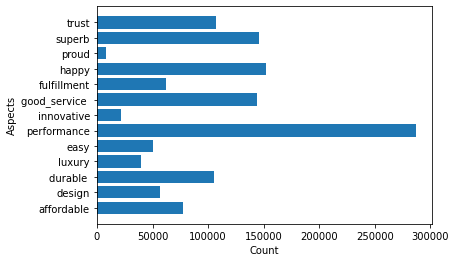

In [ ]:
import matplotlib.pyplot as plt
# plt로 시각화
y = np.arange(len(list(pre_aspect_df.columns)))
asps = list(pre_aspect_df.columns)

value = []

for aspect in list(pre_aspect_df.columns):
  value.append(sum(df[aspect]))
  # print('=====')
  # print(aspect)
  # print(df[aspect].value_counts())
plt.barh(y, value)
plt.yticks(y, asps)
plt.xlabel("Count")
plt.ylabel("Aspects")
plt.show()

In [ ]:
brand_aspect_count = pd.DataFrame(data= [value],columns = asps).T
brand_aspect_count.to_excel('brand_aspect_all_count')

,0
affordable,77868
design,56533
durable,104940
luxury,39336
easy,50624
performance,286921
innovative,21326
good_service,143815
fulfillment,62017
happy,151792


### 회사별 aspect 분포

In [ ]:
lg = ['lg_ref','lg_wm','lg_ac','lg_rac']
lg_df = df[df['label'].apply(lambda label: label in lg)]

ss = ['ss_ac','ss_rac','ss_ref', 'ss_wm']
ss_df = df[df['label'].apply(lambda label: label in ss)]

In [ ]:
lg_df

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,...,0,0,0,0,0,0,0,0,0,0
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,...,1,0,1,0,0,0,0,0,0,1
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,...,0,0,0,0,1,0,0,0,0,0
6,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,and based on my research it is not easy to cha...,and based on my research it is not easy to cha...,...,0,1,0,0,0,0,0,0,0,0
10,WEB_100_sg_60A151EA545F0EE99DFE2242188DD8AE,NaN,Forums,Dec 31 12:49:00 2021,forums.redflagdeals.com,lg_ref,"['I am in dire need of a dishwasher, fridge, f...","['i am in dire need of a dishwasher, fridge, f...",but i have heard so many terrible things about...,but i have heard so many terrible things about...,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052055,YOUTUBE_44_Ugxj0UCcRZnUW0wLvdZ4AaABAg,YOUTUBE,Youtube,2020-06-06 08:34:12,NaN,lg_ac,NaN,NaN,NaN,"Hi this is Rakesh here from titwala, I have co...",...,0,0,0,0,0,1,1,1,0,1
1052056,YOUTUBE_44_Ugxm5A9GlKlSadtMF_h4AaABAg,YOUTUBE,Youtube,2020-06-06 08:30:46,NaN,lg_ac,NaN,NaN,NaN,"Hi this is Rakesh here from titwala, I have co...",...,0,0,0,0,0,1,1,1,0,1
1052057,YOUTUBE_42_UgzLPIa1WRZv9IxoKfl4AaABAg.99OzkKId...,YOUTUBE,Youtube,2020-06-04 10:55:31,NaN,lg_ac,NaN,NaN,NaN,Model no.Ls-q12ynza\nNormal or energy saving m...,...,0,0,1,0,0,0,0,0,0,0
1052060,YOUTUBE_44_Ugyx8bJWtY6UjPvtHOd4AaABAg,YOUTUBE,Youtube,2020-04-28 18:07:51,NaN,lg_ac,NaN,NaN,NaN,"For LW8019ER *200BTU Ridiculous, they added a ...",...,0,0,1,0,0,1,0,0,0,0


In [ ]:
ss_df

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
48608,WEB_100_501ee965d04d1893ecfa251b471e8b23,NaN,Forums,Dec 31 12:46:00 2019,us.community.samsung.com,ss_ref,['Just wondering if there is an update to your...,['i talked to the warranty service department ...,i talked to the warranty service department to...,i talked to the warranty service department to...,...,0,0,0,0,1,0,0,0,0,1
48609,WEB_100_501ee965d04d1893ecfa251b471e8b23,NaN,Forums,Dec 31 12:46:00 2019,us.community.samsung.com,ss_ref,['Just wondering if there is an update to your...,['i talked to the warranty service department ...,this icemaker has been repaired replaced times...,this icemaker has been repaired replaced times...,...,0,0,0,0,1,0,0,0,0,0
48610,WEB_100_501ee965d04d1893ecfa251b471e8b23,NaN,Forums,Dec 31 12:46:00 2019,us.community.samsung.com,ss_ref,['Just wondering if there is an update to your...,['i talked to the warranty service department ...,so now i am wondering if samsung has actually ...,so now i am wondering if samsung has actually ...,...,0,0,0,0,1,0,0,0,0,0
48612,WEB_100_sg_0219B5EDAF89D6AFDCD956628423A948,NaN,Forums,Dec 31 12:11:00 2019,forums.androidcentral.com,ss_ref,['Originally Posted by 1countryboy What do ...,['i use a samsung fast wireless stand but it s...,i use a samsung fast wireless stand but it sti...,i use a samsung fast wireless stand but it sti...,...,0,0,1,0,0,0,0,0,0,0
48614,WEB_100_e8f9ec7bbd0c1e27dd8cfcca6751426b,NaN,Forums,Dec 31 10:55:00 2019,us.community.samsung.com,ss_ref,['So i filled my glass with ice cubes out of t...,['so i filled my glass with ice cubes out of t...,tech called who was rude to come out and it co...,tech called who was rude to come out and it co...,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055768,YOUTUBE_44_UgxOHRzGKxG3cvjKhC94AaABAg,YOUTUBE,Youtube,2018-01-11 07:30:49,NaN,ss_ac,NaN,NaN,NaN,Maybe samsung will also release smart closet! ...,...,0,0,0,0,0,0,1,0,0,0
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,...,1,0,0,0,0,0,0,0,0,0
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,...,0,0,1,0,0,0,0,0,0,0
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
asps = list(pre_aspect_df.columns)

lgvalue = []

for aspect in list(pre_aspect_df.columns):
  lgvalue.append(sum(lg_df[aspect]))

lg_count_df = pd.DataFrame([lgvalue],columns = asps)
lg_count_df = lg_count_df.T
lg_count_df.reset_index(inplace = True)
lg_count_df.columns = ['Aspects','LG']

ssvalue = []

for aspect in list(pre_aspect_df.columns):
  ssvalue.append(sum(ss_df[aspect]))

ss_count_df = pd.DataFrame([ssvalue],columns = asps)
ss_count_df = ss_count_df.T
ss_count_df.reset_index(inplace = True)
ss_count_df.columns = ['Aspects','SAMSUNG']


In [ ]:
count_all = pd.merge(ss_count_df, lg_count_df,on = 'Aspects')
count_all.index = count_all.Aspects
count_all = count_all.drop('Aspects',axis = 1)


In [ ]:
count_all
count_all.to_excel('aspect_dist_brand.xlsx')

### aspect 분류된 df 저장

In [ ]:
with open("asp_brand_df.pkl",'wb') as fw:
  pickle.dump(df,fw)

In [ ]:
# with open("asp_brand_df.pkl",'rb') as fr:
#   df = pickle.load(fr)

### Aspect term 등장 횟수 count

In [ ]:
pre_aspect_df

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,NaN,NaN,NaN,NaN,crease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN,NaN,creasing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,NaN,NaN,NaN,NaN,NaN,wrinkly,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,NaN,NaN,NaN,NaN,NaN,wrinklier,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,...,0,0,0,0,0,0,0,0,0,0
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,...,1,0,1,0,0,0,0,0,0,1
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,...,0,0,0,0,1,0,0,0,0,0
6,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,and based on my research it is not easy to cha...,and based on my research it is not easy to cha...,...,0,1,0,0,0,0,0,0,0,0
10,WEB_100_sg_60A151EA545F0EE99DFE2242188DD8AE,NaN,Forums,Dec 31 12:49:00 2021,forums.redflagdeals.com,lg_ref,"['I am in dire need of a dishwasher, fridge, f...","['i am in dire need of a dishwasher, fridge, f...",but i have heard so many terrible things about...,but i have heard so many terrible things about...,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055768,YOUTUBE_44_UgxOHRzGKxG3cvjKhC94AaABAg,YOUTUBE,Youtube,2018-01-11 07:30:49,NaN,ss_ac,NaN,NaN,NaN,Maybe samsung will also release smart closet! ...,...,0,0,0,0,0,0,1,0,0,0
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,...,1,0,0,0,0,0,0,0,0,0
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,...,0,0,1,0,0,0,0,0,0,0
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,...,0,0,0,0,0,0,1,0,1,0


### 수 세기

In [ ]:
file_ = "brand"

# counting
from tqdm import tqdm
tqdm.pandas()

def count_aspect_term(aspect_term,df):
  count = sum(df['joint_words'].apply(lambda sent: aspect_term in sent))
  return count

# count df 생성
count_df = pd.DataFrame(data = [],columns =['aspect_term', 'count','aspect'])
count_df


for col in pre_aspect_df.columns:
  asp = pre_aspect_df[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    count_df = count_df.append(pd.DataFrame([[aspect_term,int(0),col]],columns =['aspect_term', 'count','aspect']))
# aspect_term in df['pre_sent']:
count_df.reset_index(drop = True, inplace = True)

count_df['count'] = count_df['aspect_term'].progress_apply(lambda aspect_term: count_aspect_term(aspect_term,df))
count_df.to_excel(file_+"_aspect_term_counts.xlsx")

100%|██████████| 1712/1712 [07:29<00:00,  3.81it/s]


In [ ]:
count_df

,aspect_term,count,aspect
0,cheap,5397,affordable
1,expensive,6037,affordable
2,priced,1291,affordable
3,pricy,86,affordable
4,pricey,616,affordable
...,...,...,...
1707,vouches,4,trust
1708,vouching,1,trust
1709,established,183,trust
1710,lawsuit,2770,trust


## AC

### Aspect Term 불러오기

In [ ]:
# aspect-aspect term framework불러오기

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term (brand_product 구분)')
aspects = pd.read_excel('ac_aspect_term.xlsx')

aspects

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,allergies,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,allergy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def preprocess_aspect_term(aspect):
  
  temp_aspects = []
  
  for aspect_term in list(aspects[aspect].dropna()):
      aspect_term = aspect_term.lower().strip()
      if len(aspect_term) < 5:
        aspect_term = " " + aspect_term
      temp_aspects.append(aspect_term)
  # print(temp_aspects)
  return temp_aspects


pre_aspect_df = pd.DataFrame(data = [])

for aspect in list(aspects.columns):
  # print(aspect)
  # aspects[aspect] = aspects[aspect].apply(lambda aspect_term: preprocess_aspect_term(aspect_term))
  pre_aspect_df = pd.concat([pre_aspect_df, pd.DataFrame(data = preprocess_aspect_term(aspect))],axis = 1)
  pre_aspect_df

pre_aspect_df.columns = aspects.columns
pre_aspect_df

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,NaN,NaN,NaN,NaN,NaN,allergies,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,allergy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pre_aspect_df['performance'].loc[137] # 4글자 미만 앞에 잘 띄워졌나 체크

' icy'

In [ ]:
#pre_aspect_df 저장-->굳이 할필요X

# # import openpyxl
# # import xlwt

# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
# file_name = "aspect_term_preprocessed.xlsx"
# # pre_aspect_df.to_excel(file_name) # 저장
# pre_aspect_df = pd.read_excel(file_name,index_col = 0)# 불러오기

# # with open(file_name,'wb') as fw:
# #     pickle.dump(pre_aspect_df,fw) 

### df 불러오기

In [ ]:
with open("acdf.pkl",'rb') as fr:
    df = pickle.load(fr)

### 분류

In [ ]:
# Aspect Classification 30분+ 소요
def classify_aspect(sent,aspect):
  sent = " " + sent # 추후 매칭 위해 앞에 띄어쓰기
  aspect_terms = pre_aspect_df[aspect].dropna() 
  aspect_terms = list(aspect_terms)
  
  result = False
  for aspect_term in aspect_terms: # 한 aspect 에 대해 aspect term 반복  
    if (aspect_term == " best") and ("best buy" in sent):
      continue
    else:
      pass

    if aspect_term in sent:
      result = True # aspect term 있으면 aspect return
    else:
      pass
    # print(aspect_term)
  if result == True:
    return 1
  else:
    return 0

# temp = df.head(500)
for aspect in list(pre_aspect_df.columns):
  # temp[aspect] = temp['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))
  df[aspect] = df['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))

100%|██████████| 64722/64722 [00:11<00:00, 5623.32it/s]


In [ ]:
print(df.shape)

from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(pre_aspect_df.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

# aspect 가 있는 문장
df[asp_exist] #1055773 중 652386 이 aspect 하나라도 있음.

(64722, 27)


100%|██████████| 64722/64722 [00:00<00:00, 94076.66it/s]


,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
181438,WEB_98_be1591b869a65ecaa38e885180f0aaa4,NaN,Blog Post,2021-12-31 06:00:00,waylonrokea.blogzet.com,ss_ac,"[""The Fact About Godrej AC Service Center in B...","['in nowadays’s earth, air-con techniques are ...",in nowadayss earth air con techniques are engi...,in nowadayss earth air con techniques are engi...,...,0,0,1,1,0,0,0,0,0,0
181439,WEB_98_be1591b869a65ecaa38e885180f0aaa4,NaN,Blog Post,2021-12-31 06:00:00,waylonrokea.blogzet.com,ss_ac,"[""The Fact About Godrej AC Service Center in B...","['in nowadays’s earth, air-con techniques are ...",repeatedly yet again your air conditioner will...,repeatedly yet again your air conditioner will...,...,0,0,1,0,1,0,0,0,1,1
181440,WEB_98_be1591b869a65ecaa38e885180f0aaa4,NaN,Blog Post,2021-12-31 06:00:00,waylonrokea.blogzet.com,ss_ac,"[""The Fact About Godrej AC Service Center in B...","['in nowadays’s earth, air-con techniques are ...",in bangalore you should always maintain the vo...,in bangalore you should always maintain the vo...,...,0,1,1,0,1,0,1,0,0,1
181441,WEB_98_be1591b869a65ecaa38e885180f0aaa4,NaN,Blog Post,2021-12-31 06:00:00,waylonrokea.blogzet.com,ss_ac,"[""The Fact About Godrej AC Service Center in B...","['in nowadays’s earth, air-con techniques are ...",now every days air conditioners are desperate ...,now every days air conditioners are desperate ...,...,0,0,0,1,0,0,0,0,0,0
181442,WEB_100_430e39866676a01e047054ed19d1d16c,NaN,Forums,2021-12-28 06:00:00,cellphoneforums.net,ss_ac,['Heating and air conditioner repair is a real...,['heating and air conditioner repair is a real...,heating and air conditioner repair is a really...,heating and air conditioner repair is a really...,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055768,YOUTUBE_44_UgxOHRzGKxG3cvjKhC94AaABAg,YOUTUBE,Youtube,2018-01-11 07:30:49,NaN,ss_ac,NaN,NaN,NaN,Maybe samsung will also release smart closet! ...,...,0,0,0,0,0,0,1,0,0,0
1055769,YOUTUBE_44_z22ns1ywrzv1xr45f04t1aokgjembf3jeur...,YOUTUBE,Youtube,2017-11-15 07:37:27,NaN,ss_ac,NaN,NaN,NaN,+Bobby Mitsubishi are considered premium Air-c...,...,1,0,0,0,0,0,0,0,0,0
1055770,YOUTUBE_44_z22qwxbr5tfdifb0yacdp4345tbervze0wa...,YOUTUBE,Youtube,2017-10-18 03:50:33,NaN,ss_ac,NaN,NaN,NaN,You should go to Vietnam \nNot the cleanest st...,...,0,0,1,0,0,0,0,0,0,0
1055772,YOUTUBE_44_z23vyj2wrzusy1phh04t1aokgqoaeas1wjf...,YOUTUBE,Youtube,2017-08-31 12:06:00,NaN,ss_ac,NaN,NaN,NaN,Asher Perlmuter IKR. That's why I was amazed b...,...,0,0,0,0,0,0,1,0,1,0


### 소스 확인

In [ ]:
sc_df = df[asp_exist].source.value_counts()
sc_df = sc_df.to_frame()
sc_df.to_excel("source_ac.xlsx")
sc_df

,source
Reviews,14172
Twitter,8423
Facebook,5890
Blog Post,5508
Forums,3044
Reddit,1875
Instagram,740
Youtube,497


### Aspect 분포

In [ ]:
df = df[asp_exist]

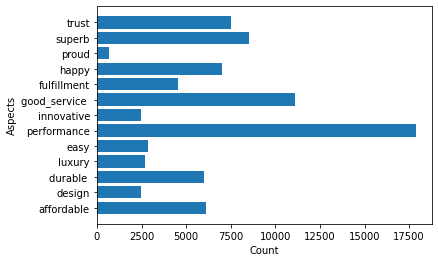

In [ ]:
import matplotlib.pyplot as plt
# plt로 시각화
y = np.arange(len(list(pre_aspect_df.columns)))
asps = list(pre_aspect_df.columns)

value = []

for aspect in list(pre_aspect_df.columns):
  value.append(sum(df[aspect]))
  # print('=====')
  # print(aspect)
  # print(df[aspect].value_counts())
plt.barh(y, value)
plt.yticks(y, asps)
plt.xlabel("Count")
plt.ylabel("Aspects")
plt.show()

### 회사별 aspect 분포

In [ ]:
lg = ['lg_ref','lg_wm','lg_ac','lg_rac']
lg_df = df[df['label'].apply(lambda label: label in lg)]

ss = ['ss_ac','ss_rac','ss_ref', 'ss_wm']
ss_df = df[df['label'].apply(lambda label: label in ss)]

In [ ]:
asps = list(pre_aspect_df.columns)

lgvalue = []

for aspect in list(pre_aspect_df.columns):
  lgvalue.append(sum(lg_df[aspect]))

lg_count_df = pd.DataFrame([lgvalue],columns = asps)
lg_count_df = lg_count_df.T
lg_count_df.reset_index(inplace = True)
lg_count_df.columns = ['Aspects','LG']

ssvalue = []

for aspect in list(pre_aspect_df.columns):
  ssvalue.append(sum(ss_df[aspect]))

ss_count_df = pd.DataFrame([ssvalue],columns = asps)
ss_count_df = ss_count_df.T
ss_count_df.reset_index(inplace = True)
ss_count_df.columns = ['Aspects','SAMSUNG']


In [ ]:
count_all = pd.merge(ss_count_df, lg_count_df,on = 'Aspects')
count_all.index = count_all.Aspects
count_all = count_all.drop('Aspects',axis = 1)


In [ ]:
count_all
count_all.to_excel('aspect_dist_ac.xlsx')

### aspect 분류된 df 저장

In [ ]:
with open("asp_ac_df.pkl",'wb') as fw:
  pickle.dump(df,fw)

### 수 세기

In [ ]:
file_ = "ac"

# counting
from tqdm import tqdm
tqdm.pandas()

def count_aspect_term(aspect_term,df):
  count = sum(df['joint_words'].apply(lambda sent: aspect_term in sent))
  return count

# count df 생성
count_df = pd.DataFrame(data = [],columns =['aspect_term', 'count','aspect'])
count_df


for col in pre_aspect_df.columns:
  asp = pre_aspect_df[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    count_df = count_df.append(pd.DataFrame([[aspect_term,int(0),col]],columns =['aspect_term', 'count','aspect']))
# aspect_term in df['pre_sent']:
count_df.reset_index(drop = True, inplace = True)

count_df['count'] = count_df['aspect_term'].progress_apply(lambda aspect_term: count_aspect_term(aspect_term,df))
count_df.to_excel(file_+"_aspect_term_counts.xlsx")

100%|██████████| 1686/1686 [00:30<00:00, 54.76it/s]


In [ ]:
count_df

,aspect_term,count,aspect
0,cheap,365,affordable
1,expensive,250,affordable
2,priced,89,affordable
3,pricy,2,affordable
4,pricey,26,affordable
...,...,...,...
1681,vouches,0,trust
1682,vouching,0,trust
1683,established,70,trust
1684,lawsuit,4,trust


## REF

### Aspect Term 불러오기

In [ ]:
# aspect-aspect term framework불러오기

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term (brand_product 구분)')
aspects = pd.read_excel('ref_aspect_term.xlsx')

aspects

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,NaN,NaN,NaN,NaN,NaN,rearrange,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,NaN,NaN,NaN,NaN,waterdrop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def preprocess_aspect_term(aspect):
  
  temp_aspects = []
  
  for aspect_term in list(aspects[aspect].dropna()):
      aspect_term = aspect_term.lower().strip()
      if len(aspect_term) < 5:
        aspect_term = " " + aspect_term
      temp_aspects.append(aspect_term)
  # print(temp_aspects)
  return temp_aspects


pre_aspect_df = pd.DataFrame(data = [])

for aspect in list(aspects.columns):
  # print(aspect)
  # aspects[aspect] = aspects[aspect].apply(lambda aspect_term: preprocess_aspect_term(aspect_term))
  pre_aspect_df = pd.concat([pre_aspect_df, pd.DataFrame(data = preprocess_aspect_term(aspect))],axis = 1)
  pre_aspect_df

pre_aspect_df.columns = aspects.columns
pre_aspect_df

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,NaN,NaN,NaN,NaN,NaN,rearrange,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,waterdrop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,ventilation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,NaN,NaN,NaN,NaN,ventilate,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pre_aspect_df['performance'].loc[137] # 4글자 미만 앞에 잘 띄워졌나 체크

' icy'

In [ ]:
#pre_aspect_df 저장-->굳이 할필요X

# # import openpyxl
# # import xlwt

# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
# file_name = "aspect_term_preprocessed.xlsx"
# # pre_aspect_df.to_excel(file_name) # 저장
# pre_aspect_df = pd.read_excel(file_name,index_col = 0)# 불러오기

# # with open(file_name,'wb') as fw:
# #     pickle.dump(pre_aspect_df,fw) 

### df 불러오기

In [ ]:
with open("refdf.pkl",'rb') as fr:
    df = pickle.load(fr)

### 분류

In [ ]:
# Aspect Classification 30분+ 소요
def classify_aspect(sent,aspect):
  sent = " " + sent # 추후 매칭 위해 앞에 띄어쓰기
  aspect_terms = pre_aspect_df[aspect].dropna() 
  aspect_terms = list(aspect_terms)
  
  result = False
  for aspect_term in aspect_terms: # 한 aspect 에 대해 aspect term 반복  
    if (aspect_term == " best") and ("best buy" in sent):
      continue
    else:
      pass

    if aspect_term in sent:
      result = True # aspect term 있으면 aspect return
    else:
      pass
    # print(aspect_term)
  if result == True:
    return 1
  else:
    return 0

# temp = df.head(500)
for aspect in list(pre_aspect_df.columns):
  # temp[aspect] = temp['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))
  df[aspect] = df['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))

100%|██████████| 634759/634759 [01:53<00:00, 5600.50it/s]


In [ ]:
print(df.shape)

from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(pre_aspect_df.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

# aspect 가 있는 문장
df[asp_exist] #1055773 중 652386 이 aspect 하나라도 있음.

(634759, 27)


100%|██████████| 634759/634759 [00:06<00:00, 92335.48it/s]


,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,REDDIT_267_rsvk9u,NaN,Reddit,Dec 31 14:54:03 2021,reddit.com,lg_ref,['Lg Model number: LMXS28626S\nImage: https://...,['lg model number: lmxs28626s\nimage: https://...,lg model number lmxs s image dispenser water k...,lg model number lmxs s image dispenser water k...,...,0,0,0,0,0,0,0,0,0,0
2,WEB_98_2f02f04879eed91a7f5de5794099cc3c,NaN,Blog Post,Dec 31 14:34:00 2021,reidmuckr.fitnell.com,lg_ref,"[""The higher the standard of a filter, the gre...",['lg refrigerator water filters present high-q...,lg refrigerator water filters present high qua...,lg refrigerator water filters present high qua...,...,1,0,1,0,0,0,0,0,0,1
4,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,i previously had an lg washer that lasted for ...,i previously had an lg washer that lasted for ...,...,0,0,0,0,1,0,0,0,0,0
6,WEB_100_sg_87167B4CEF951B83B2E73A5A8C79DF4B,NaN,Forums,Dec 31 14:21:00 2021,forums.redflagdeals.com,lg_ref,"[""bobcat99 wrote: ↑\nTwo people and you don't ...",['i previously had an lg washer that lasted fo...,and based on my research it is not easy to cha...,and based on my research it is not easy to cha...,...,0,1,0,0,0,0,0,0,0,0
10,WEB_100_sg_60A151EA545F0EE99DFE2242188DD8AE,NaN,Forums,Dec 31 12:49:00 2021,forums.redflagdeals.com,lg_ref,"['I am in dire need of a dishwasher, fridge, f...","['i am in dire need of a dishwasher, fridge, f...",but i have heard so many terrible things about...,but i have heard so many terrible things about...,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975635,TWITTER_7_1344741372662669313,TWITTER,Twitter,Dec 31 20:25:02 2020,NaN,ss_ref,NaN,NaN,NaN,@kiwinerd This is so true. Have tried just sta...,...,0,0,0,1,1,1,0,0,1,1
975637,TWITTER_4_1344739444499369985,TWITTER,Twitter,Dec 31 20:17:22 2020,NaN,ss_ref,NaN,NaN,NaN,A truly unforgettable year in our Family Hub. ...,...,0,0,0,0,0,0,1,0,0,0
975639,TWITTER_2_1344729134451339265,TWITTER,Twitter,Dec 31 19:36:24 2020,NaN,ss_ref,NaN,NaN,NaN,bit.ly/37RLEMh #Samsung #samsunguk I wouldn't ...,...,0,0,0,0,1,0,0,0,0,0
975641,TWITTER_7_1344700951072964609,TWITTER,Twitter,Dec 31 17:44:25 2020,NaN,ss_ref,NaN,NaN,NaN,@freeze_bw HAPPY NEW YEAR TOO TZ❤️\^0^/ I HOPE...,...,0,0,0,0,0,0,1,0,0,0


### 소스 확인

In [ ]:
sc_df = df[asp_exist].source.value_counts()
sc_df = sc_df.to_frame()
sc_df.to_excel("source_ref.xlsx")
sc_df

,source
Reviews,180580
Twitter,79198
Facebook,45361
Forums,37234
Reddit,22813
Blog Post,12222
Instagram,5347
Youtube,2399


### Aspect 분포

In [ ]:
df = df[asp_exist]

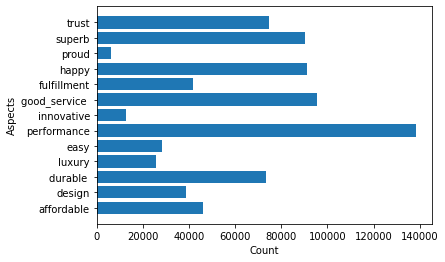

In [ ]:
import matplotlib.pyplot as plt
# plt로 시각화
y = np.arange(len(list(pre_aspect_df.columns)))
asps = list(pre_aspect_df.columns)

value = []

for aspect in list(pre_aspect_df.columns):
  value.append(sum(df[aspect]))
  # print('=====')
  # print(aspect)
  # print(df[aspect].value_counts())
plt.barh(y, value)
plt.yticks(y, asps)
plt.xlabel("Count")
plt.ylabel("Aspects")
plt.show()

### 회사별 aspect 분포

In [ ]:
lg = ['lg_ref','lg_wm','lg_ac','lg_rac']
lg_df = df[df['label'].apply(lambda label: label in lg)]

ss = ['ss_ac','ss_rac','ss_ref', 'ss_wm']
ss_df = df[df['label'].apply(lambda label: label in ss)]

In [ ]:
asps = list(pre_aspect_df.columns)

lgvalue = []

for aspect in list(pre_aspect_df.columns):
  lgvalue.append(sum(lg_df[aspect]))

lg_count_df = pd.DataFrame([lgvalue],columns = asps)
lg_count_df = lg_count_df.T
lg_count_df.reset_index(inplace = True)
lg_count_df.columns = ['Aspects','LG']

ssvalue = []

for aspect in list(pre_aspect_df.columns):
  ssvalue.append(sum(ss_df[aspect]))

ss_count_df = pd.DataFrame([ssvalue],columns = asps)
ss_count_df = ss_count_df.T
ss_count_df.reset_index(inplace = True)
ss_count_df.columns = ['Aspects','SAMSUNG']


In [ ]:
count_all = pd.merge(ss_count_df, lg_count_df,on = 'Aspects')
count_all.index = count_all.Aspects
count_all = count_all.drop('Aspects',axis = 1)


In [ ]:
count_all
count_all.to_excel('aspect_dist_ref.xlsx')

### aspect 분류된 df 저장

In [ ]:
with open("asp_ref_df.pkl",'wb') as fw:
  pickle.dump(df,fw)

### 수 세기

In [ ]:
file_ = "ref"

# counting
from tqdm import tqdm
tqdm.pandas()

def count_aspect_term(aspect_term,df):
  count = sum(df['joint_words'].apply(lambda sent: aspect_term in sent))
  return count

# count df 생성
count_df = pd.DataFrame(data = [],columns =['aspect_term', 'count','aspect'])
count_df


for col in pre_aspect_df.columns:
  asp = pre_aspect_df[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    count_df = count_df.append(pd.DataFrame([[aspect_term,int(0),col]],columns =['aspect_term', 'count','aspect']))
# aspect_term in df['pre_sent']:
count_df.reset_index(drop = True, inplace = True)

count_df['count'] = count_df['aspect_term'].progress_apply(lambda aspect_term: count_aspect_term(aspect_term,df))
count_df.to_excel(file_+"_aspect_term_counts.xlsx")

100%|██████████| 1695/1695 [04:24<00:00,  6.41it/s]


In [ ]:
count_df

,aspect_term,count,aspect
0,cheap,3398,affordable
1,expensive,4140,affordable
2,priced,755,affordable
3,pricy,60,affordable
4,pricey,379,affordable
...,...,...,...
1690,vouches,4,trust
1691,vouching,0,trust
1692,established,79,trust
1693,lawsuit,2625,trust


## WM

### Aspect Term 불러오기

In [ ]:
# aspect-aspect term framework불러오기

os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term (brand_product 구분)')
aspects = pd.read_excel('wm_aspect_term.xlsx')

aspects

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,NaN,NaN,NaN,NaN,NaN,crease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,NaN,NaN,NaN,NaN,NaN,creasing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,NaN,NaN,NaN,NaN,NaN,wrinkly,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN,wrinklier,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def preprocess_aspect_term(aspect):
  
  temp_aspects = []
  
  for aspect_term in list(aspects[aspect].dropna()):
      aspect_term = aspect_term.lower().strip()
      if len(aspect_term) < 5:
        aspect_term = " " + aspect_term
      temp_aspects.append(aspect_term)
  # print(temp_aspects)
  return temp_aspects


pre_aspect_df = pd.DataFrame(data = [])

for aspect in list(aspects.columns):
  # print(aspect)
  # aspects[aspect] = aspects[aspect].apply(lambda aspect_term: preprocess_aspect_term(aspect_term))
  pre_aspect_df = pd.concat([pre_aspect_df, pd.DataFrame(data = preprocess_aspect_term(aspect))],axis = 1)
  pre_aspect_df

pre_aspect_df.columns = aspects.columns
pre_aspect_df

,affordable,design,durable,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
0,cheap,classy,durable,luxury,convenient,practical,innovative,repair,failure,happy,dignity,superior,quality
1,expensive,classier,durably,luxuries,convenience,functionality,innovation,installation,fail,happier,grace,cruddy,durable
2,priced,classiest,duration,premium,intuitive,functional,innovate,installed,acceptable,happiest,honored,inferior,durability
3,pricy,fancy,durability,luxurious,intuition,functioning,innovations,install,satisfied,happiness,honorable,unimpressive,failure
4,pricey,fancied,lasted,exclusive,intuitiveness,function,innovational,installers,satisfaction,happily,honorary,impressive,defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,NaN,NaN,NaN,NaN,crease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN,NaN,creasing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,NaN,NaN,NaN,NaN,NaN,wrinkly,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,NaN,NaN,NaN,NaN,NaN,wrinklier,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pre_aspect_df['performance'].loc[137] # 4글자 미만 앞에 잘 띄워졌나 체크

' icy'

In [ ]:
#pre_aspect_df 저장-->굳이 할필요X

# # import openpyxl
# # import xlwt

# os.chdir('/gdrive/MyDrive/LG 플젝-민/topic 존재 확인/최종 Aspect Term 기반 작업')
# file_name = "aspect_term_preprocessed.xlsx"
# # pre_aspect_df.to_excel(file_name) # 저장
# pre_aspect_df = pd.read_excel(file_name,index_col = 0)# 불러오기

# # with open(file_name,'wb') as fw:
# #     pickle.dump(pre_aspect_df,fw) 

### df 불러오기

In [ ]:
with open("wmdf.pkl",'rb') as fr:
    df = pickle.load(fr)

### 분류

In [ ]:
# Aspect Classification 30분+ 소요
def classify_aspect(sent,aspect):
  sent = " " + sent # 추후 매칭 위해 앞에 띄어쓰기
  aspect_terms = pre_aspect_df[aspect].dropna() 
  aspect_terms = list(aspect_terms)
  
  result = False
  for aspect_term in aspect_terms: # 한 aspect 에 대해 aspect term 반복  
    if (aspect_term == " best") and ("best buy" in sent):
      continue
    else:
      pass

    if aspect_term in sent:
      result = True # aspect term 있으면 aspect return
    else:
      pass
    # print(aspect_term)
  if result == True:
    return 1
  else:
    return 0

# temp = df.head(500)
for aspect in list(pre_aspect_df.columns):
  # temp[aspect] = temp['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))
  df[aspect] = df['joint_words'].progress_apply(lambda sent: classify_aspect(sent,aspect))

100%|██████████| 356293/356293 [01:03<00:00, 5632.98it/s]


In [ ]:
print(df.shape)

from tqdm import tqdm
tqdm.pandas()

def aspect_detecter(aspects):
  if sum(aspects) == 0:
    return False
  else:
    return True

asp_exist = df[list(pre_aspect_df.columns)].progress_apply(lambda aspects: aspect_detecter(aspects),axis = 1)

# aspect 가 있는 문장
df[asp_exist] #1055773 중 652386 이 aspect 하나라도 있음.

(356293, 27)


100%|██████████| 356293/356293 [00:03<00:00, 91979.17it/s]


,UniversalMessageId,SocialNetwork,source,CreatedTime,Domain,label,sents,customer_sents,remove_link_punc,original,...,luxury,easy,performance,innovative,good_service,fulfillment,happy,proud,superb,trust
129915,WEB_100_sg_67F436917A96D67FCA6C903F5EE1CD42,NaN,Forums,Dec 31 14:55:00 2021,slickdeals.net,ss_wm,"[""They can't get cheap enough for me to buy an...","[""they can't get cheap enough for me to buy an...",they can t get cheap enough for me to buy any ...,they can t get cheap enough for me to buy any ...,...,1,0,0,0,0,0,0,0,0,0
129918,WEB_100_4f768aa32d536e7f18e1ab520473e6ca,NaN,Forums,Dec 31 06:15:00 2021,samsung.com,ss_wm,"['Love this machine!', 'We had the Samsung fro...",['we had the samsung front load and those were...,we had the samsung front load and those were a...,we had the samsung front load and those were a...,...,0,0,0,0,0,0,0,0,1,0
129919,WEB_100_4f768aa32d536e7f18e1ab520473e6ca,NaN,Forums,Dec 31 06:15:00 2021,samsung.com,ss_wm,"['Love this machine!', 'We had the Samsung fro...",['we had the samsung front load and those were...,the vrt technology was a joke and those machin...,the vrt technology was a joke and those machin...,...,0,0,0,1,0,0,0,0,0,0
129920,WEB_100_4f768aa32d536e7f18e1ab520473e6ca,NaN,Forums,Dec 31 06:15:00 2021,samsung.com,ss_wm,"['Love this machine!', 'We had the Samsung fro...",['we had the samsung front load and those were...,we got this washer along with the dryer last w...,we got this washer along with the dryer last w...,...,0,0,1,0,0,0,1,0,0,0
129921,REDDIT_273_hqm5r6f,NaN,Reddit,Dec 30 23:58:26 2021,reddit.com,ss_wm,"['Sammy working for me in Ontario.', 'Washer /...",['washer / dryer continues to announce when cy...,washer dryer continues to announce when cycles...,washer dryer continues to announce when cycles...,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050988,TWITTER_5_1344716062030516228,TWITTER,Twitter,Dec 31 18:44:27 2020,NaN,lg_wm,NaN,NaN,NaN,"Hi there, I want to buy LG washer 5.2 cu. ft t...",...,0,0,1,0,0,0,0,0,0,0
1050989,TWITTER_5_1344713725551521800,TWITTER,Twitter,Dec 31 18:35:10 2020,NaN,lg_wm,NaN,NaN,NaN,Hey folks- Very disappointed having my 7 year ...,...,0,0,0,0,0,1,0,0,0,0
1050991,TWITTER_4_1344682486350004224,TWITTER,Twitter,Dec 31 16:31:02 2020,NaN,lg_wm,NaN,NaN,NaN,Dear @LGUS I bought your top of the line Washe...,...,0,0,1,0,0,0,0,0,0,0
1050992,FACEBOOK_15_147689085280634_3557208097662032,FACEBOOK,Facebook,Dec 31 16:26:26 2020,NaN,lg_wm,NaN,NaN,NaN,My washer has been forming rust spots especial...,...,0,0,0,0,1,0,0,0,1,1


### 소스 확인

In [ ]:
sc_df = df[asp_exist].source.value_counts()
sc_df = sc_df.to_frame()
sc_df.to_excel("source_wm.xlsx")
sc_df

,source
Reviews,169675
Twitter,21532
Facebook,14661
Forums,13569
Reddit,12812
Blog Post,5540
Youtube,1822
Instagram,1479


### Aspect 분포

In [ ]:
df = df[asp_exist]

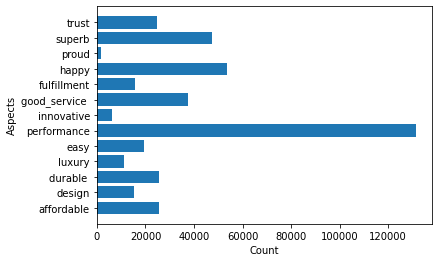

In [ ]:
import matplotlib.pyplot as plt
# plt로 시각화
y = np.arange(len(list(pre_aspect_df.columns)))
asps = list(pre_aspect_df.columns)

value = []

for aspect in list(pre_aspect_df.columns):
  value.append(sum(df[aspect]))
  # print('=====')
  # print(aspect)
  # print(df[aspect].value_counts())
plt.barh(y, value)
plt.yticks(y, asps)
plt.xlabel("Count")
plt.ylabel("Aspects")
plt.show()

### 회사별 aspect 분포

In [ ]:
lg = ['lg_ref','lg_wm','lg_ac','lg_rac']
lg_df = df[df['label'].apply(lambda label: label in lg)]

ss = ['ss_ac','ss_rac','ss_ref', 'ss_wm']
ss_df = df[df['label'].apply(lambda label: label in ss)]

In [ ]:
asps = list(pre_aspect_df.columns)

lgvalue = []

for aspect in list(pre_aspect_df.columns):
  lgvalue.append(sum(lg_df[aspect]))

lg_count_df = pd.DataFrame([lgvalue],columns = asps)
lg_count_df = lg_count_df.T
lg_count_df.reset_index(inplace = True)
lg_count_df.columns = ['Aspects','LG']

ssvalue = []

for aspect in list(pre_aspect_df.columns):
  ssvalue.append(sum(ss_df[aspect]))

ss_count_df = pd.DataFrame([ssvalue],columns = asps)
ss_count_df = ss_count_df.T
ss_count_df.reset_index(inplace = True)
ss_count_df.columns = ['Aspects','SAMSUNG']


In [ ]:
count_all = pd.merge(ss_count_df, lg_count_df,on = 'Aspects')
count_all.index = count_all.Aspects
count_all = count_all.drop('Aspects',axis = 1)


In [ ]:
count_all
count_all.to_excel('aspect_dist_wm.xlsx')

### aspect 분류된 df 저장

In [ ]:
with open("asp_wm_df.pkl",'wb') as fw:
  pickle.dump(df,fw)

### 수 세기

In [ ]:
file_ = "wm"

# counting
from tqdm import tqdm
tqdm.pandas()

def count_aspect_term(aspect_term,df):
  count = sum(df['joint_words'].apply(lambda sent: aspect_term in sent))
  return count

# count df 생성
count_df = pd.DataFrame(data = [],columns =['aspect_term', 'count','aspect'])
count_df


for col in pre_aspect_df.columns:
  asp = pre_aspect_df[col]
  asp = asp.dropna()
  asp = list(asp)
  for aspect_term in asp:
    count_df = count_df.append(pd.DataFrame([[aspect_term,int(0),col]],columns =['aspect_term', 'count','aspect']))
# aspect_term in df['pre_sent']:
count_df.reset_index(drop = True, inplace = True)

count_df['count'] = count_df['aspect_term'].progress_apply(lambda aspect_term: count_aspect_term(aspect_term,df))
count_df.to_excel(file_+"_aspect_term_counts.xlsx")

100%|██████████| 1712/1712 [02:37<00:00, 10.87it/s]


In [ ]:
count_df

,aspect_term,count,aspect
0,cheap,1634,affordable
1,expensive,1647,affordable
2,priced,447,affordable
3,pricy,24,affordable
4,pricey,211,affordable
...,...,...,...
1707,vouches,0,trust
1708,vouching,1,trust
1709,established,34,trust
1710,lawsuit,141,trust
